# Lending club case study Notebook

This notebook analyzes the lending club data and provides recommendations to the stakeholders. 

In [1]:
# All the imports go here
import pandas as pd #To modify and work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
#supress scientific notation of values
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# loading the lending club data set
# df_lending_club is the dataframe variable name 
file_name = "loan.csv"
df_lending_club = pd.read_csv(file_name,index_col=0,engine='python')
df_lending_club.head(5)
# display total number of rows and columns
df_lending_club.shape

(39717, 110)

# Missing data analysis 

We will find the number of missing values, the columns which have only empty values, empty rows,
Once things are identified we will remove the empty columns, rows or the columns/rows where all the entries are NaN.


In [3]:
print(df_lending_club.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 110 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    member_id                       39717 non-null  int64  
 1    loan_amnt                       39717 non-null  int64  
 2    funded_amnt                     39717 non-null  int64  
 3    funded_amnt_inv                 39717 non-null  float64
 4    term                            39717 non-null  object 
 5    int_rate                        39717 non-null  object 
 6    installment                     39717 non-null  float64
 7    grade                           39717 non-null  object 
 8    sub_grade                       39717 non-null  object 
 9    emp_title                       37258 non-null  object 
 10   emp_length                      38642 non-null  object 
 11   home_ownership                  39717 non-null  object 
 12   annual_inc

With the information above we see that there are total 110 columns. Many columns where all the values are set to null. Identify all such columns and remove them from the dataframe. This will remove the non-useful information from dataframe 

In [4]:
# Find the columns where each value is null
empty_cols = [col for col in df_lending_club.columns if df_lending_club[col].isnull().all()]
# print the list of empty columns
print(empty_cols)
# Number of such columns where all empty values are present
print(len(empty_cols))

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

Remove all the columns with all empty/null/NA values

In [5]:
# Drop these columns from the dataframe
df_lending_club.drop(empty_cols,
        axis=1,
        inplace=True)
print(df_lending_club.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

After removing all the redundant columns we are left with 56 columns now

In [6]:
# Removing columns with non-useful information

del df_lending_club['url']
del df_lending_club['desc']
del df_lending_club['title']
del df_lending_club['emp_title']
del df_lending_club['pymnt_plan']
del df_lending_club['zip_code']
del df_lending_club['addr_state']
del df_lending_club['initial_list_status']
del df_lending_club['policy_code']
del df_lending_club['next_pymnt_d']

# There are certain columns with customer behavior. These variables are not available at time of loan approval and hence should 
#not be used
customer_behavior_variables = "delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type"
customer_behavior_columns = customer_behavior_variables.split(',')
print(len(customer_behavior_columns))

# remove the columns present in the list variable customer_behavior_columns by iterating over the list

for col in customer_behavior_columns:
    del df_lending_club[col]
    
print(df_lending_club.info(verbose=True, show_counts=True))


21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d               

In [7]:

print(df_lending_club.describe())


       member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
count   39717.00   39717.00     39717.00         39717.00     39717.00   
mean   850463.56   11219.44     10947.71         10397.45       324.56   
std    265678.31    7456.67      7187.24          7128.45       208.87   
min     70699.00     500.00       500.00             0.00        15.69   
25%    666780.00    5500.00      5400.00          5000.00       167.02   
50%    850812.00   10000.00      9600.00          8975.00       280.22   
75%   1047339.00   15000.00     15000.00         14400.00       430.78   
max   1314167.00   35000.00     35000.00         35000.00      1305.19   

       annual_inc      dti  mths_since_last_delinq  mths_since_last_record  \
count    39717.00 39717.00                14035.00                 2786.00   
mean     68968.93    13.32                   35.90                   69.70   
std      63793.77     6.68                   22.02                   43.82   
min       4000.00    

Find and remove all the rows with high percentage of missing/null/Nan values


In [8]:
#print(df_lending_club.isnull().sum(axis=1).tolist())
print("Maximum number of empty values in any row in dataframe is", max(df_lending_club.isnull().sum(axis=1).tolist()))


Maximum number of empty values in any row in dataframe is 6


Now the maximum number of missing values in any of the row in dataset is 6. There are total 24 columns left now. The highest number seems to be around 25%. Hence we may not want to remove any of the rows as of now

# Removal of un-useful data 
The loan status values where status is current cannot be used for our analysis as current loans will not convey any information on the customer behavior. So we should remove all such data. 

In [9]:
df_lending_club = df_lending_club[df_lending_club.loan_status != "Current"]
# checking if all current status has been removed or not
df_lending_club.loan_status.unique()
#array(['Fully Paid', 'Charged Off'], dtype=object) so all Current status are removed

array(['Fully Paid', 'Charged Off'], dtype=object)

# Data manipulation 
$1$. A lot of data has some special characters like int rates has % which needs to be sanitized/removed. <br>
$2$. The emp_length has values containing the string years/year which needs to be sanitized/removed. <br>
$3$. The emp_length has Nan values so we will insert it with 0 that will help treat these values later as numbers <br>
$4$. Emp_length for 10+years will be considered as 10 <br>
$5$. Emp_length <1 year will be considered as 0 year <br>



In [10]:
df_lending_club.head()

#Remove % from interest rates
# We have to use double str conversion here int_rate is of float type
df_lending_club.int_rate = df_lending_club['int_rate'].astype(str).str.strip('%').astype(float)
#print(df_lending_club.head())
df_lending_club.dtypes
df_lending_club.emp_length.fillna(0, inplace=True)
#From emp_length column we need to remove years and treat 10+ as 10 and <1 as 0
df_lending_club.emp_length = pd.to_numeric(df_lending_club['emp_length'].astype(str).apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
print(df_lending_club.head())

         member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000          4975.00   36 months   
1077430    1314167       2500         2500          2500.00   60 months   
1077175    1313524       2400         2400          2400.00   36 months   
1076863    1277178      10000        10000         10000.00   36 months   
1075269    1311441       5000         5000          5000.00   36 months   

         int_rate  installment grade sub_grade  emp_length  ...  \
id                                                          ...   
1077501     10.65       162.87     B        B2          10  ...   
1077430     15.27        59.83     C        C4           0  ...   
1077175     15.96        84.33     C        C5          10  ...   
1076863     13.49       339.31     C        C1          10  ...   
1075269      7.90       156.46     A        A4           3  ...   

    

# Outlier analysis

Outlier analysis of 
loan amount, annual income, installment, dti,  int_rate, installment is done by simply plotting box plot of each of them


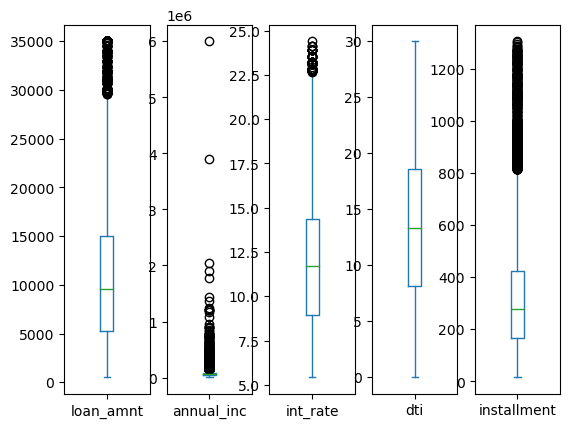

count   38577.00
mean    11047.03
std      7348.44
min       500.00
5%       2400.00
10%      3090.00
25%      5300.00
50%      9600.00
75%     15000.00
90%     21600.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [11]:
df_lending_club[["loan_amnt", "annual_inc", "int_rate", "dti","installment"]].plot(kind= "box", subplots= True)
plt.show()

df_lending_club.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


In [12]:
df_lending_club.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


count     38577.00
mean      68777.97
std       64218.68
min        4000.00
5%        24000.00
10%       30000.00
25%       40000.00
50%       58868.00
75%       82000.00
90%      115000.00
95%      140004.00
99%      234144.00
max     6000000.00
Name: annual_inc, dtype: float64

In [13]:
df_lending_club.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


count   38577.00
mean       11.93
std         3.69
min         5.42
5%          6.17
10%         7.14
25%         8.94
50%        11.71
75%        14.38
90%        16.82
95%        18.31
99%        20.99
max        24.40
Name: int_rate, dtype: float64

In [14]:
df_lending_club.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


count   38577.00
mean       13.27
std         6.67
min         0.00
5%          2.10
10%         4.06
25%         8.13
50%        13.37
75%        18.56
90%        22.29
95%        23.80
99%        26.53
max        29.99
Name: dti, dtype: float64

In [15]:
df_lending_club.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   38577.00
mean      322.47
std       208.64
min        15.69
5%         70.61
10%        98.99
25%       165.74
50%       277.86
75%       425.55
90%       620.90
95%       760.82
99%       931.09
max      1305.19
Name: installment, dtype: float64

Observation : Many of the continuous variables are having outliers where values are present outside the 95th quantile we should 
    remove these values wherever possible for our analysis. But we observed that after removing data the further analysis losses information so we did not remove the outliers

# Univariate Analysis

For univariate analysis we will analyse following continuous and categorical variables one by one by plotting bar charts, histograms

## Continuous variables to be analysed <br>
$1$. loan_amnt <br>
$2$. annual_inc <br>
$3$. int_rate   <br>
$4$. dti        <br>
$5$. installment  <br>
$6$. funded_amnt  <br>

funded_amnt_inv will mostly behave similar to funded_amnt but there might be slight variation

## Categorical variables to be analysed  <br>

$1$. term <br>
$2$. loan_status <br>
$3$. verification_status <br>
$4$. home_ownership <br>
$5$. emp_length <br>
$6$. grade <br>
$7$. sub_grade <br>
$8$. pub_rec_bankruptcies <br>
$9$. purpose <br>
$10$. issue_d <br>




#### $1$. Analysing loan_amnt

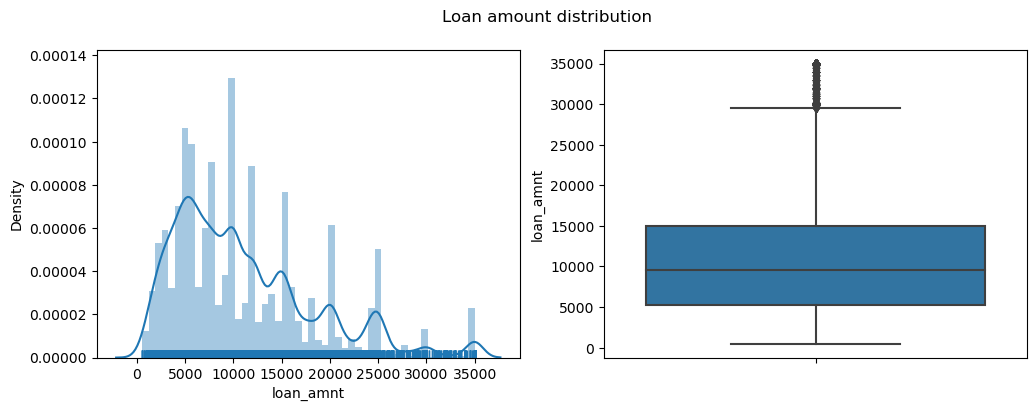

count   38577.00
mean    11047.03
std      7348.44
min       500.00
5%       2400.00
10%      3090.00
25%      5300.00
50%      9600.00
75%     15000.00
90%     21600.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [16]:

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df_lending_club.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(y=df_lending_club['loan_amnt'])
#Single title for both subplots.
plt.suptitle('Loan amount distribution')
plt.show()

#sns.boxplot(df_lending_club.loan_amnt)

df_lending_club.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


Observation : 25th to 75th quantile for loan_amnt exist between 5000-15000. Large number of loans of amount 10000 exist. There were outliers in 95th to 99th quantile where loan amount was between 25000-35000


#### $2$. Analysing  annual_inc

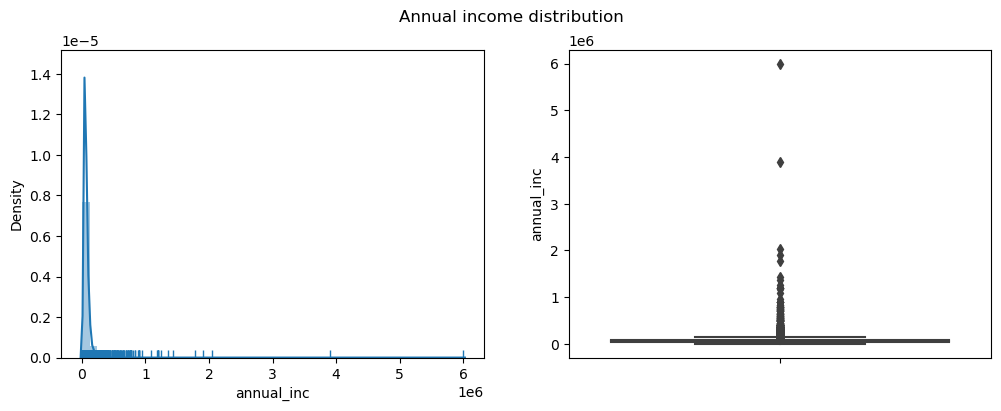

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
5%        24000.00
10%       30000.00
25%       40000.00
50%       58868.00
75%       82000.00
90%      115000.00
95%      140004.00
99%      234144.00
max     6000000.00
Name: annual_inc, dtype: float64

In [17]:

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df_lending_club.annual_inc, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(y=df_lending_club['annual_inc'])
#Single title for both subplots.
plt.suptitle('Annual income distribution')
plt.show()

df_lending_club.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observation : 99% people have annual income less than 234144. 
    

#### $3$.  Analysing int_rate 


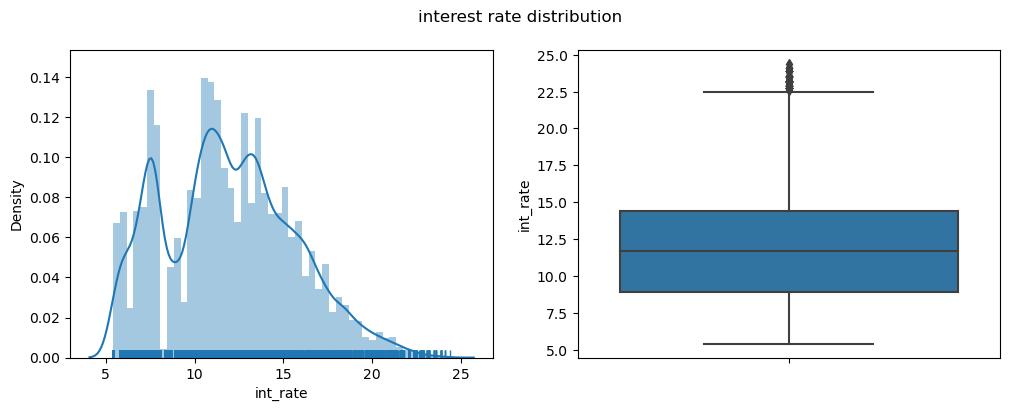

count   38577.00
mean       11.93
std         3.69
min         5.42
5%          6.17
10%         7.14
25%         8.94
50%        11.71
75%        14.38
90%        16.82
95%        18.31
99%        20.99
max        24.40
Name: int_rate, dtype: float64

In [18]:
# plotting the variable
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df_lending_club.int_rate, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(y=df_lending_club['int_rate'])
#Single title for both subplots.
plt.suptitle('interest rate distribution')
plt.show()

df_lending_club.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])


Observation : Generally int_rates are between 8 to 15 but goes as high as 22.5 and there are some outliers as well

#### $4$.  analyze dti



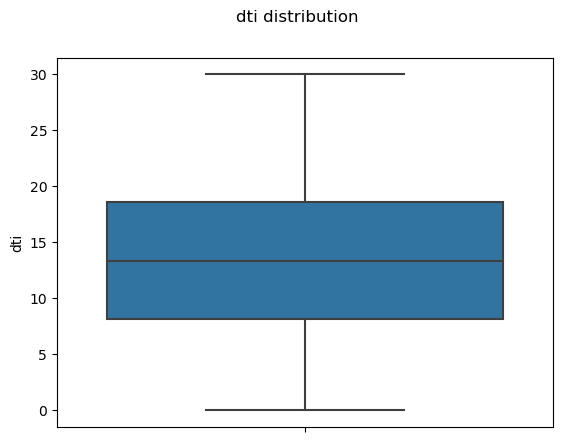

count   38577.00
mean       13.27
std         6.67
min         0.00
5%          2.10
10%         4.06
25%         8.13
50%        13.37
75%        18.56
90%        22.29
95%        23.80
99%        26.53
max        29.99
Name: dti, dtype: float64

In [19]:



#Box plot
sns.boxplot(y=df_lending_club['dti'])
#Single title for both subplots.
plt.suptitle('dti distribution')
plt.show()


df_lending_club.dti.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observation: <br>
    dti value mostly lies between 8 to 18 and highest being 30

#### $5$. Analyzing installment

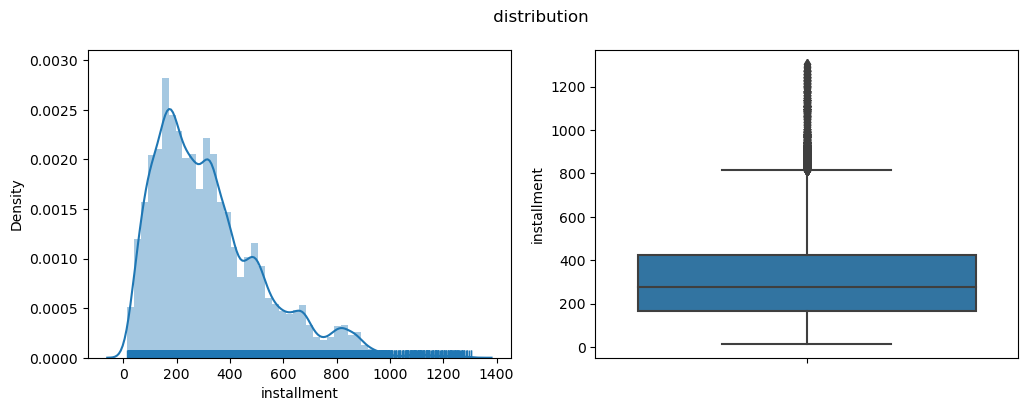

count   38577.00
mean      322.47
std       208.64
min        15.69
5%         70.61
10%        98.99
25%       165.74
50%       277.86
75%       425.55
90%       620.90
95%       760.82
99%       931.09
max      1305.19
Name: installment, dtype: float64

In [20]:

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df_lending_club.installment, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(y=df_lending_club['installment'])
#Single title for both subplots.
plt.suptitle(' distribution')
plt.show()


df_lending_club.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observation: Installment mostly lies between 150 to 400 with max being around 715

### Visualizing categorical variables and analyzing them

#### $1$.  Analyzing term (loan terms)

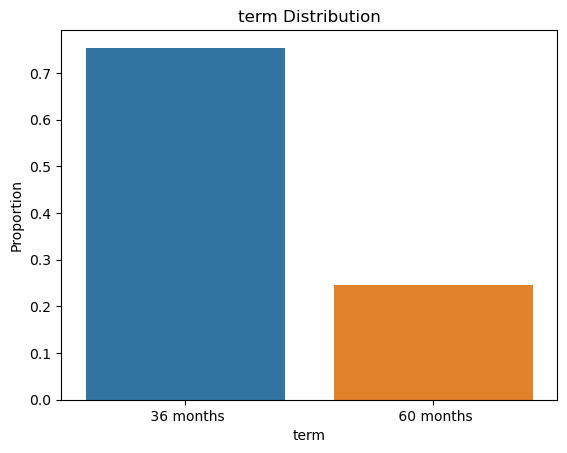

In [21]:

#Percentage of each category in categorical variable 
per_df = df_lending_club['term'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='term', data=per_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('term'+' Distribution')
plt.show()

Analysis : 80% of the loans are of 36months and 20% are of 60months tenure

#### $2$. Analyzing loan status

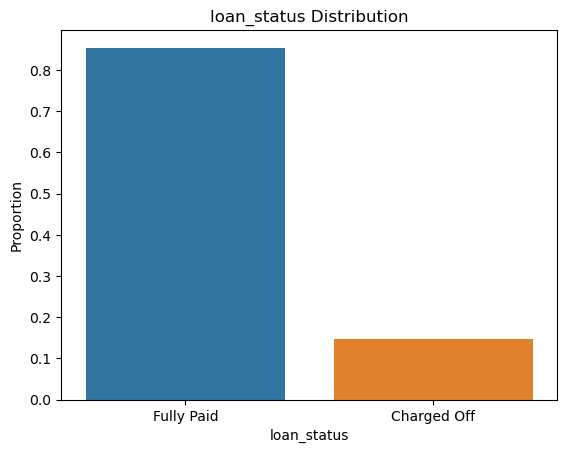

In [22]:
#Percentage of each category in categorical variable 
per_df = df_lending_club['loan_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='loan_status', data=per_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('loan_status'+' Distribution')
plt.show()


Analysis : More than 85% of the loans availed have been fully paid. The percentage of defaulted loans < 15%

#### $3$. Analyzing verification_status (income verified)

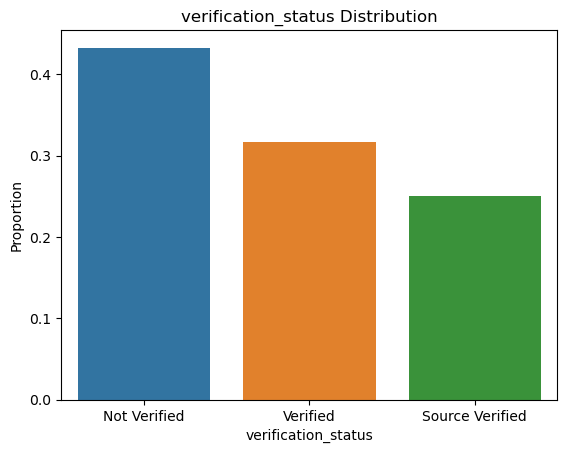

In [23]:
#Percentage of each category in categorical variable 
per_df = df_lending_club['verification_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='verification_status', data=per_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('verification_status'+' Distribution')
plt.show()

Analysis : 
    $1$. For approx 50% loans the income of borrower was not verified by LC. <br>
    $2$. For approx 25% loans the source of income was verified by LC. <br>
    $3$. For approx 25% loans the income of borrower was verified by LC. <br>

#### $4$. Analyzing home_ownership

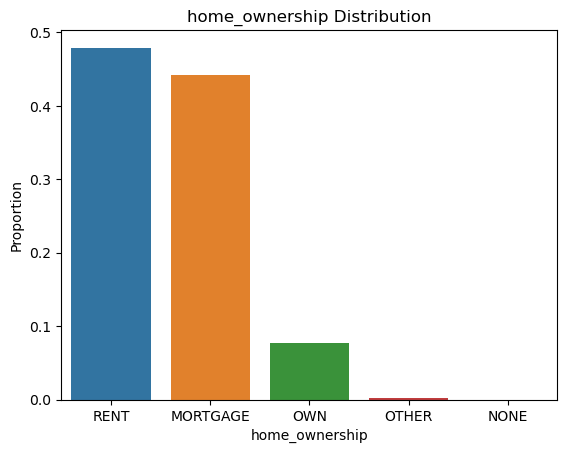

In [24]:
#Percentage of each category in categorical variable 
df_lending_club.dtypes
per_df = df_lending_club['home_ownership'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='home_ownership', data=per_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('home_ownership'+' Distribution')
plt.show()


Analysis:
    $1$. Very few people actually own a house <br>
    $2$. Most of the people are living in rented or mortgauged house <br>

#### $5$. Analyzing emp_length (this denotes the length of service of borrower)

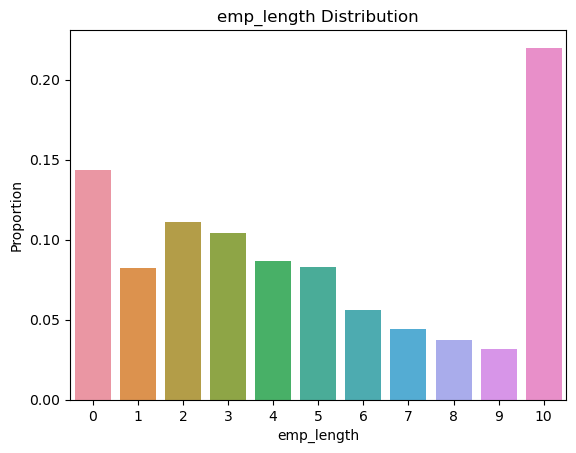

In [25]:
per_df = df_lending_club['emp_length'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='emp_length', data=per_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('emp_length'+' Distribution')
plt.show()

Analysis
$1$. Highest percentage of employees who took loan have employee service of 10 or more years <br>
$2$. Second highest percentage of employees who took loan have service tenure of less than a year <br>

#### $6$. Analyzing the grade of loan (assigned by LC)

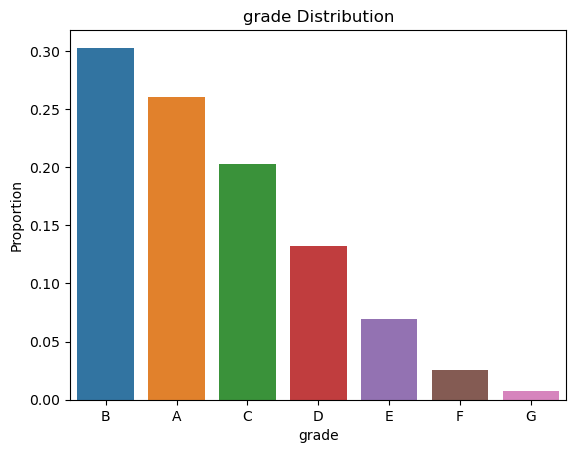

In [26]:
per_df = df_lending_club['grade'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='grade', data=per_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('grade'+' Distribution')
plt.show()

More than 50% borrowers fall under loan grade A,B

#### $7$. Analyzing sub_grade of loan (assigned by LC)

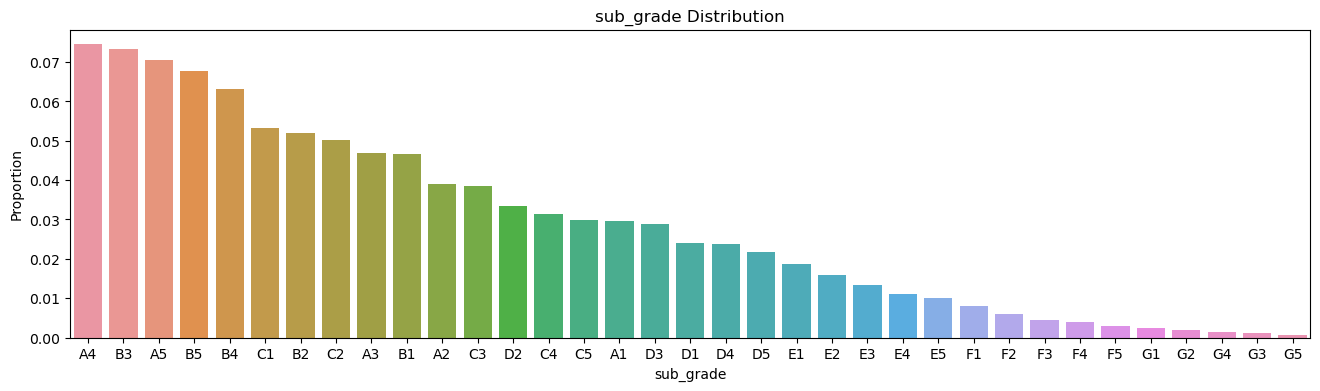

In [27]:
plt.figure(figsize=(16,4))
per_df = df_lending_club['sub_grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='sub_grade', data=per_df)
plt.xlabel('sub_grade')
plt.ylabel('Proportion')
plt.title('sub_grade'+' Distribution')
plt.show()

Observation: Nothing much can be inferred but we can see categories E1,E2,E3,..., G1 have very less borrowers

#### $8$. Analyzing pub_rec_bankruptcies

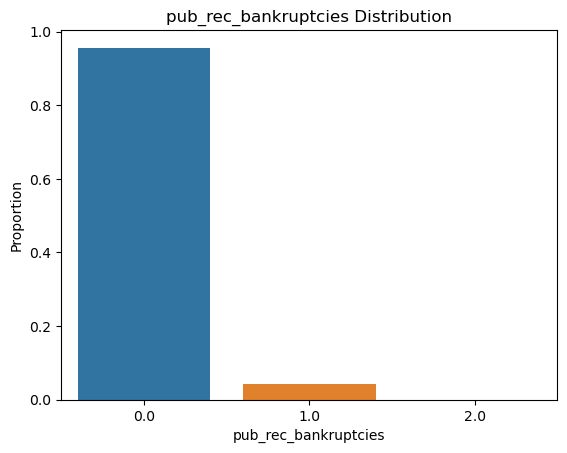

In [28]:
per_df = df_lending_club['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='pub_rec_bankruptcies', data=per_df)
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Proportion')
plt.title('pub_rec_bankruptcies'+' Distribution')
plt.show()

Observations : Most of the borrowers do not have any record of bankruptcies

#### $9$. Analyzing purpose of the loan

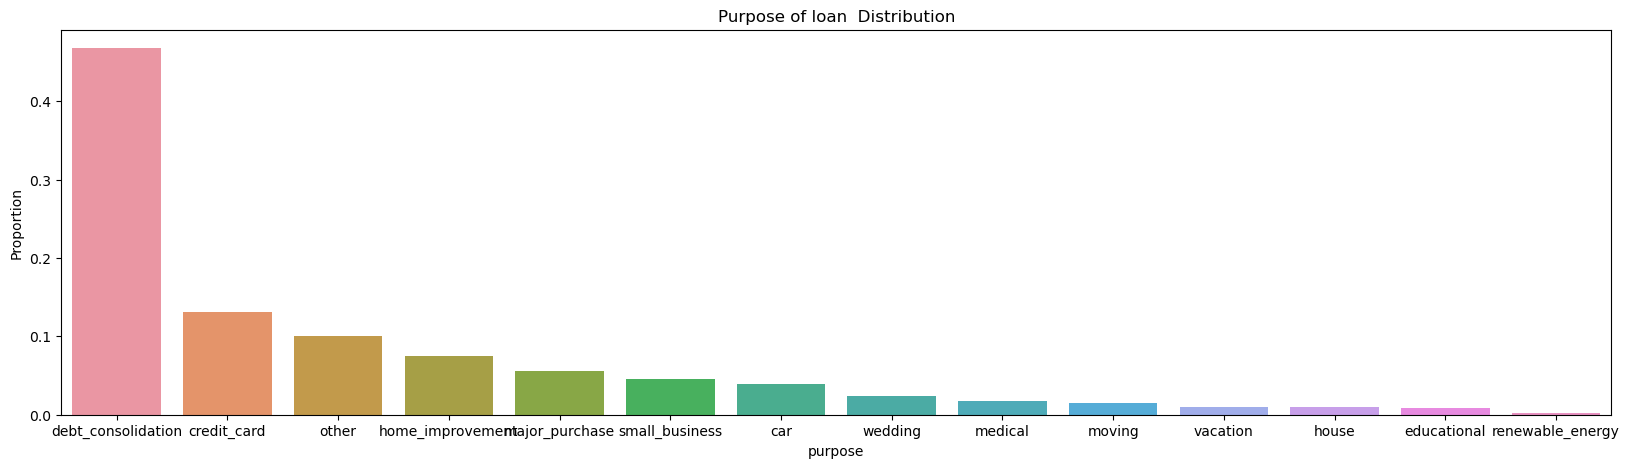

In [29]:
plt.figure(figsize=(20,5))
per_df = df_lending_club['purpose'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='purpose', data=per_df)
plt.xlabel('purpose')
plt.ylabel('Proportion')
plt.title('Purpose of loan '+' Distribution')
plt.show()

Observation : Around 50% of purpose given by borrowers is debt_consolidation

### Segmented Univariate Analysis
#### $1$. Loan amount will be analyzed against various categorical variables

Text(0.5, 1.0, 'emp_length vs Loan Amount')

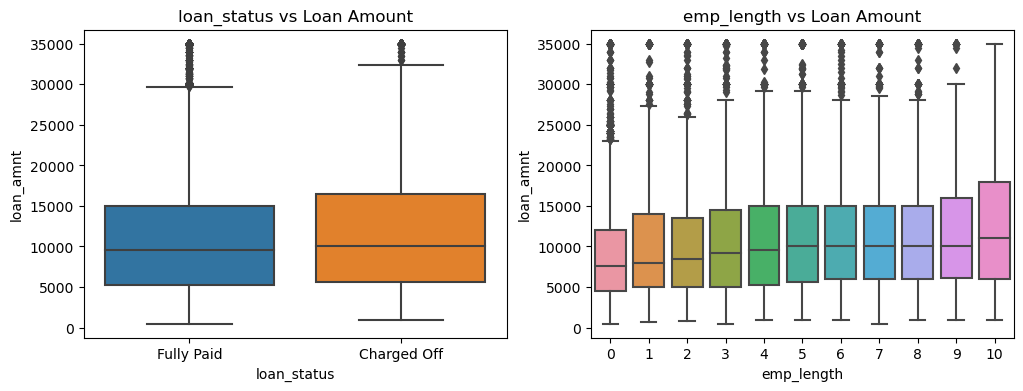

In [30]:
#### Analyzing loan_status v/s loan_amount  and emp_length v/s loan_amount

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('loan_status vs Loan Amount')
plt.subplot(1,2,2)
sns.boxplot(x='emp_length', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('emp_length vs Loan Amount')

Observations : Charged off loans have higher amounts. As employment length increases the mean loan amount increases

Text(0.5, 1.0, 'grade vs Loan Amount')

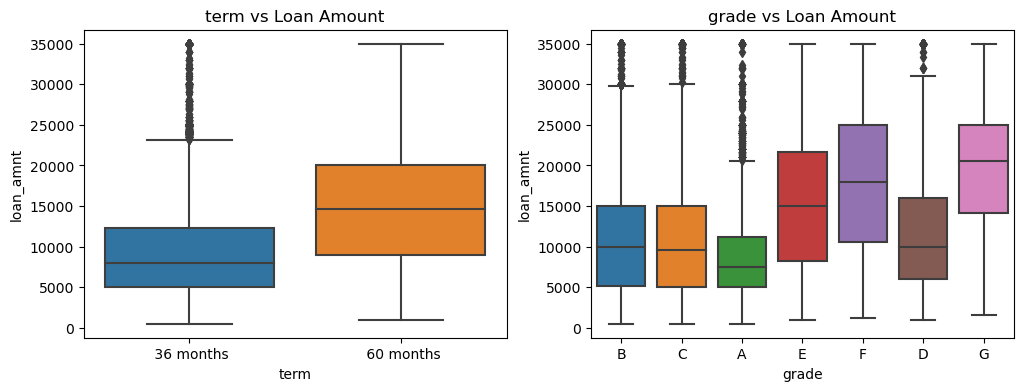

In [31]:
### Loan amount v/s term and Loan amount v/s grade
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='term', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('term vs Loan Amount')
plt.subplot(1,2,2)
sns.boxplot(x='grade', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('grade vs Loan Amount')

Observation : Higher amount loans have higher tenure ( 60 months )
Grade G have taken max loan amount. As Grades are decreasing the loan amount is increasing.

Text(0.5, 1.0, 'verification_status vs Loan Amount')

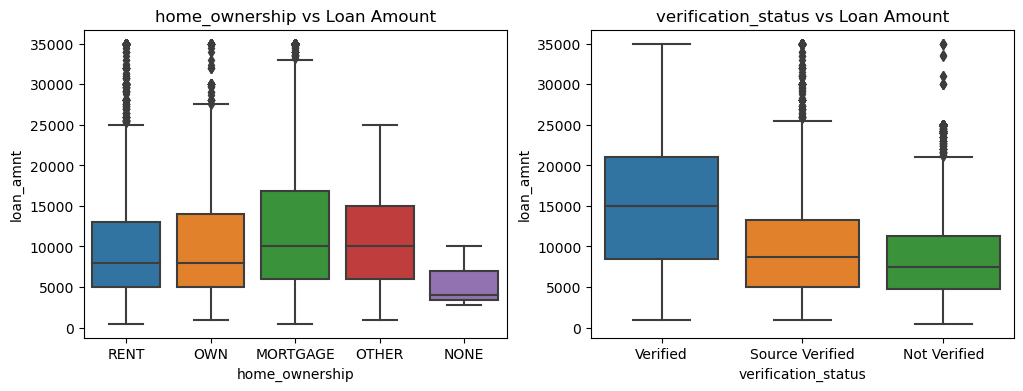

In [32]:
# Loan_amount vs home ownership and loan_amount vs verification status
### Loan amount v/s term and Loan amount v/s grade
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('home_ownership vs Loan Amount')
plt.subplot(1,2,2)
sns.boxplot(x='verification_status', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('verification_status vs Loan Amount')

Observation : highest borrowers are from MORTAGE 
And most of borrowers are verified for borrowing loan >9k (approx)

Text(0.5, 1.0, 'purpose vs Loan Amount')

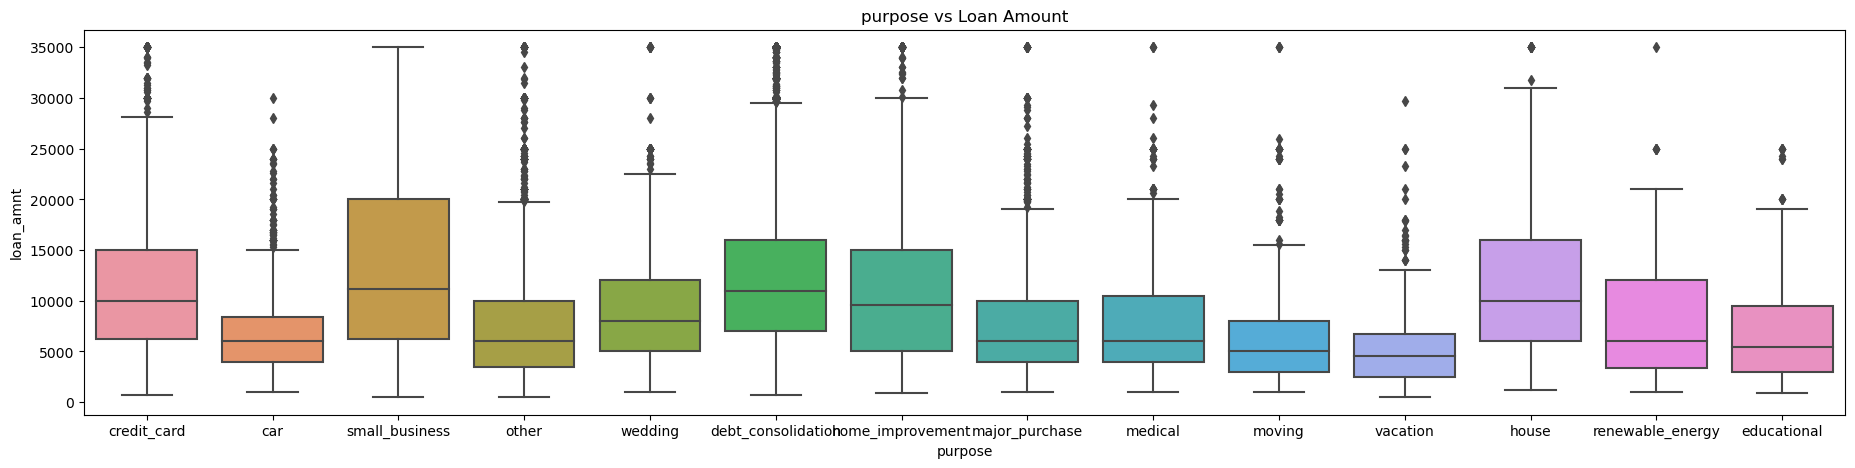

In [33]:
plt.figure(figsize=(50,5))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='purpose', y=df_lending_club.loan_amnt, data=df_lending_club)
plt.title('purpose vs Loan Amount')

Observation : People take higher loan amount for small businesses and next is for house.
              Small loans are taken for vacation and car  

#### $2$.  int_rate will be analyzed against various categorical variables


Text(0.5, 1.0, 'emp_length vs interest rate')

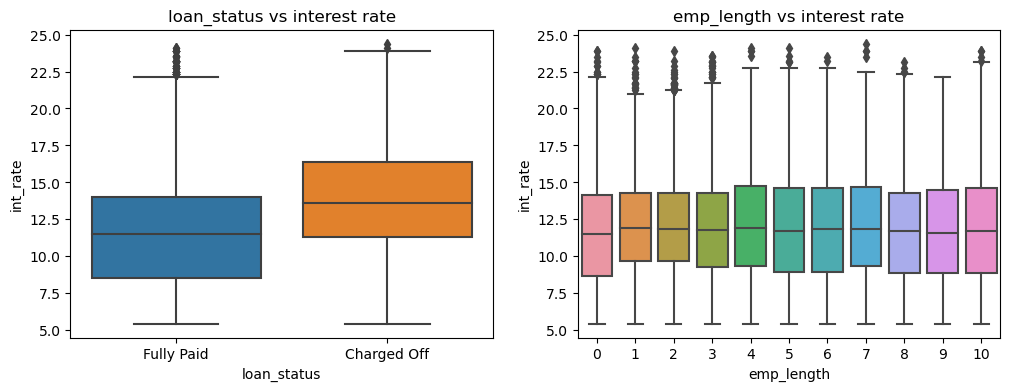

In [34]:
# int_rate v/s loan status and int_rate v/s emp_length
# 1
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('loan_status vs interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='emp_length', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('emp_length vs interest rate')


Text(0.5, 1.0, 'grade vs interest rate')

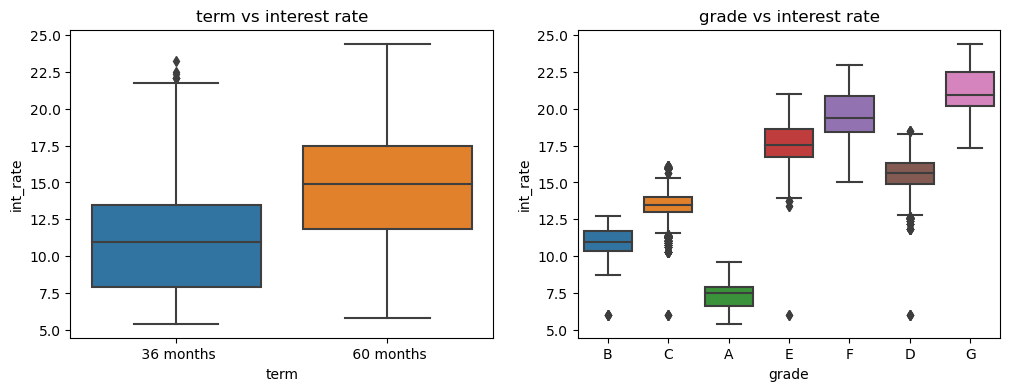

In [35]:
# 2
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='term', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('term vs interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='grade', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('grade vs interest rate')

Observations : Higher tenure rates generally have high interest rates.
    Interest rates increases as grades goes from A -> G

Text(0.5, 1.0, 'verification_status vs interest rate')

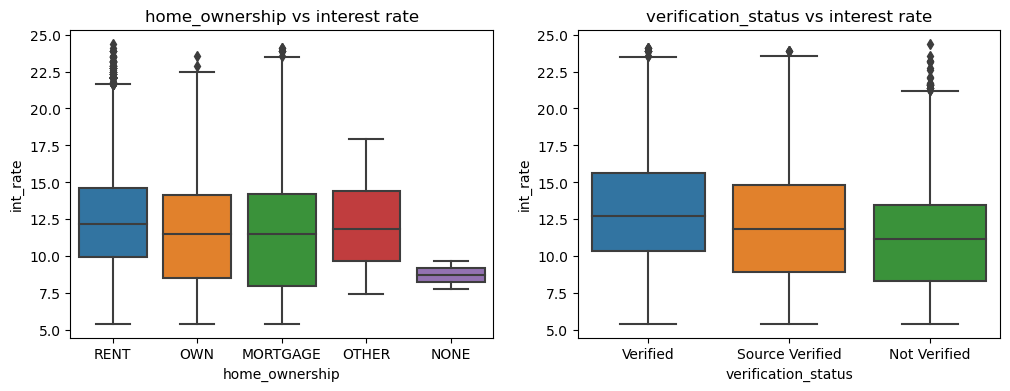

In [36]:
# 3
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('home_ownership vs interest rate')
plt.subplot(1,2,2)
sns.boxplot(x='verification_status', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('verification_status vs interest rate')

Observation : int_rate for borrowers having own house or mortgage are less.
not_verified borrowers are getting less int_rate on the loan

Text(0.5, 1.0, 'purpose vs int_rate')

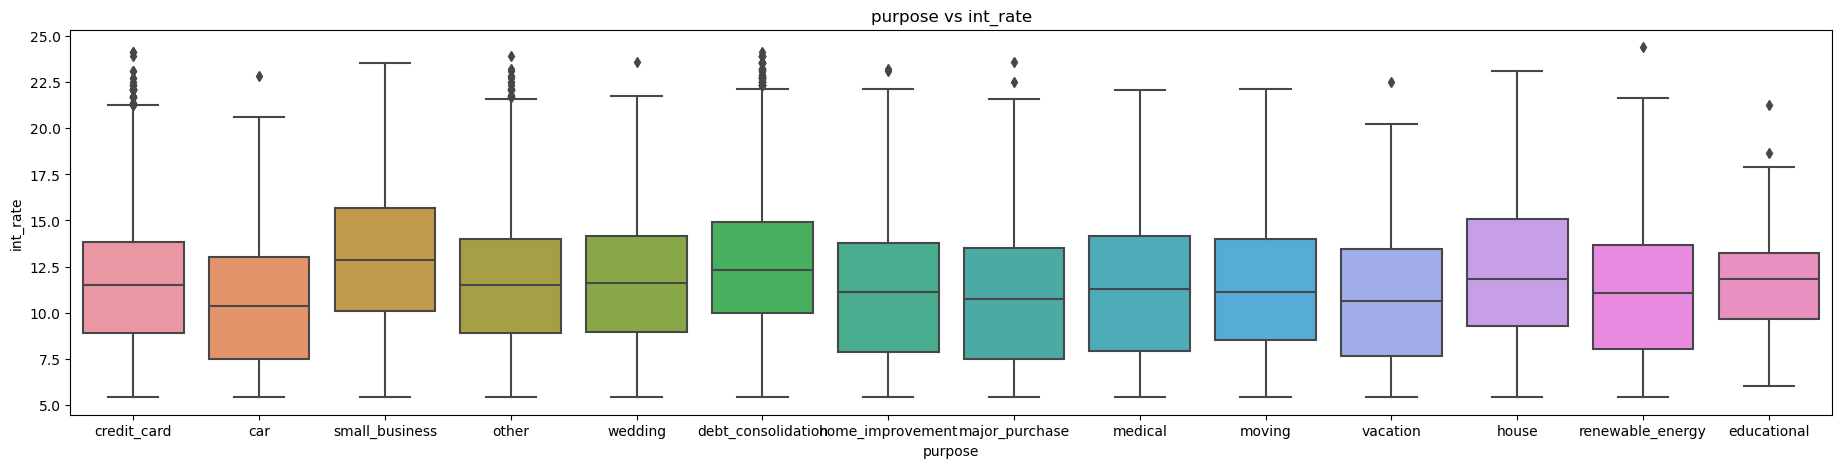

In [37]:
plt.figure(figsize=(50,5))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='purpose', y=df_lending_club.int_rate, data=df_lending_club)
plt.title('purpose vs int_rate')

Observations : Small business and house loans are given at higher int_rate

#### $3$.  annual_inc will be analyzed against various categorical variables

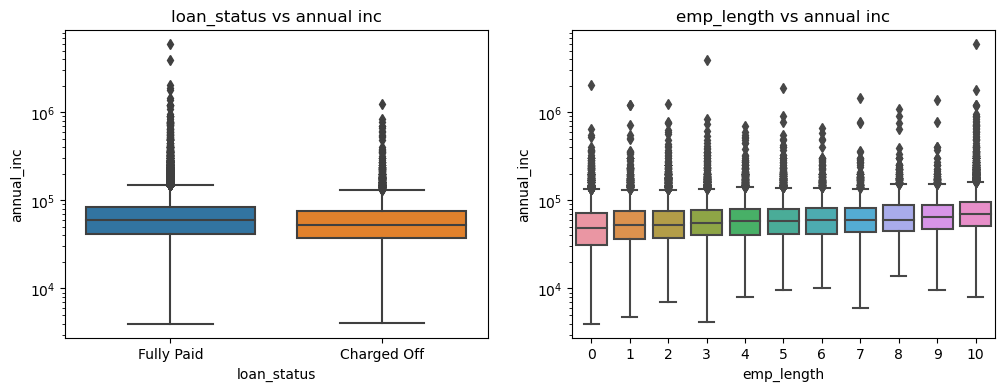

In [38]:

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y=df_lending_club.annual_inc, data=df_lending_club)
plt.title('loan_status vs annual inc')
plt.yscale('log')
plt.subplot(1,2,2)
sns.boxplot(x='emp_length', y=df_lending_club.annual_inc, data=df_lending_club)
plt.title('emp_length vs annual inc')
plt.yscale('log')

Observation: Annual income for fully paid and charged off loans is very slightly different. For charged off loans it is slightly less
    Annual income gradually increases with increase in emp_length

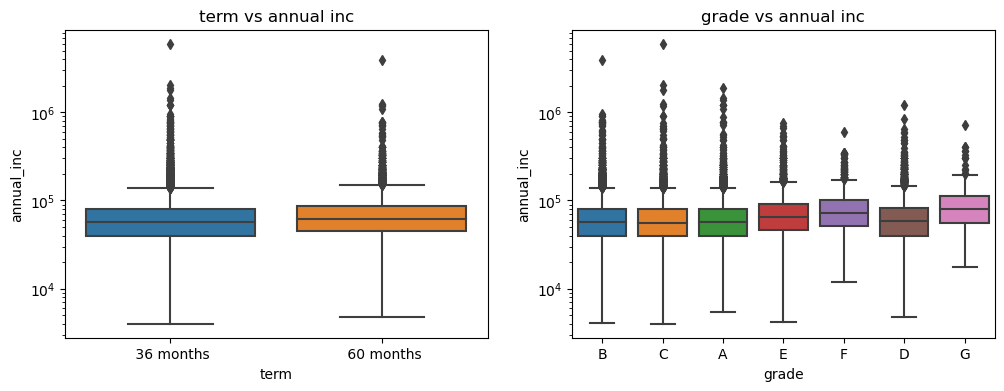

In [39]:

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='term', y=df_lending_club.annual_inc, data=df_lending_club)
plt.title('term vs annual inc')
plt.yscale('log')
plt.subplot(1,2,2)
sns.boxplot(x='grade', y=df_lending_club.annual_inc, data=df_lending_club)
plt.title('grade vs annual inc')
plt.yscale('log')

Observation : Borrowers with higher income are taking loans which have lower grades F and G (A (high) -> G (low))

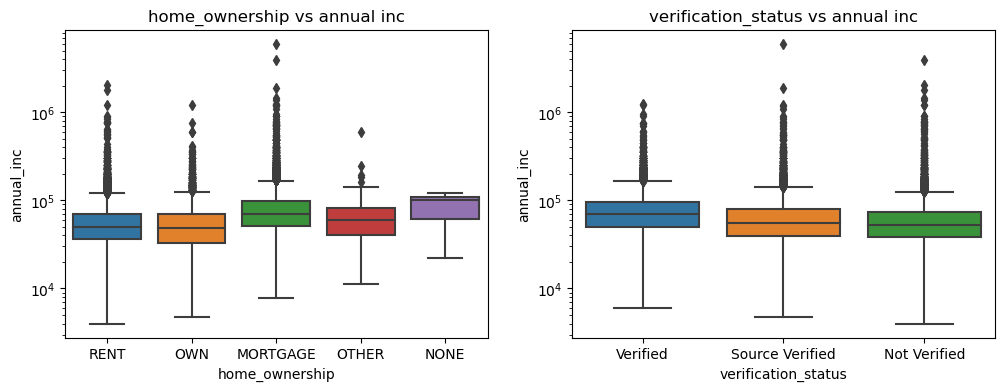

In [40]:
# 3
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y=df_lending_club.annual_inc, data=df_lending_club)
plt.title('home_ownership vs annual inc')
plt.yscale('log')
plt.subplot(1,2,2)
sns.boxplot(x='verification_status', y=df_lending_club.annual_inc, data=df_lending_club)
plt.title('verification_status vs annual inc')
plt.yscale('log')

Observations : Borrowers with verified income have higher annual_inc.
    Mortgage home_ownership has higher annual income

Text(0.5, 1.0, 'purpose vs Annual_inc')

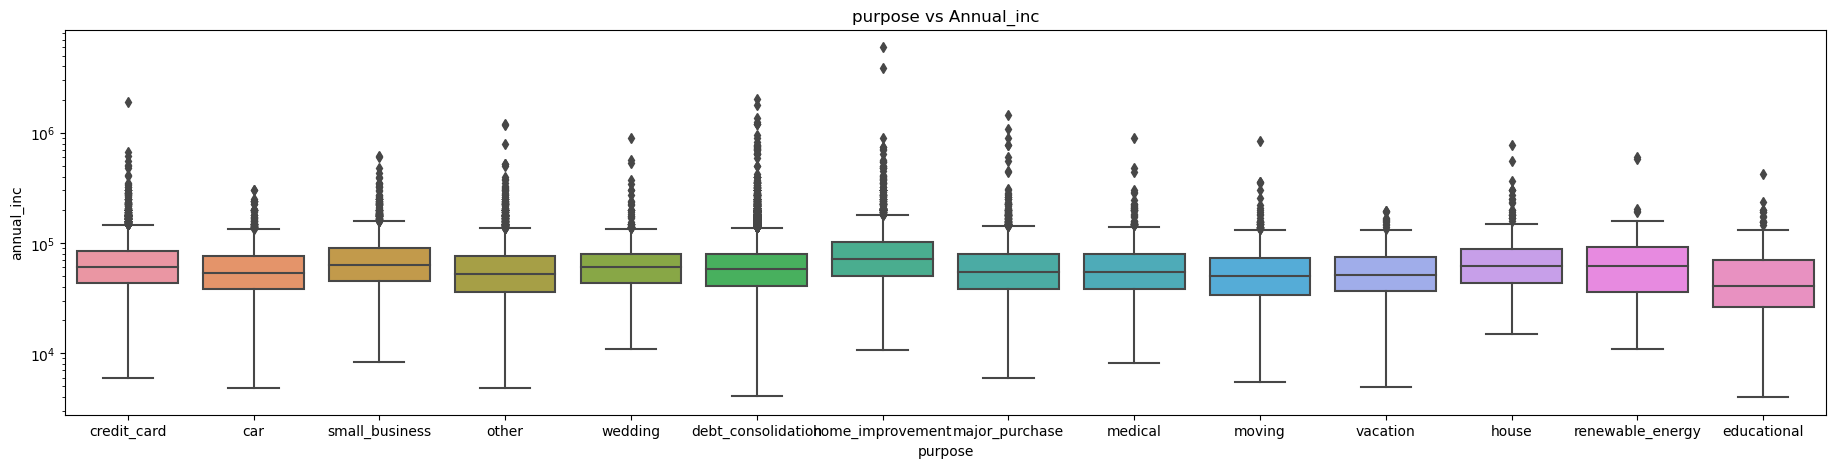

In [41]:
plt.figure(figsize=(50,5))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='purpose', y=df_lending_club.annual_inc, data=df_lending_club)
plt.yscale('log')
plt.title('purpose vs Annual_inc')

#### dti will be analyzed against various categorical variables

Text(0.5, 1.0, 'emp_length vs dti')

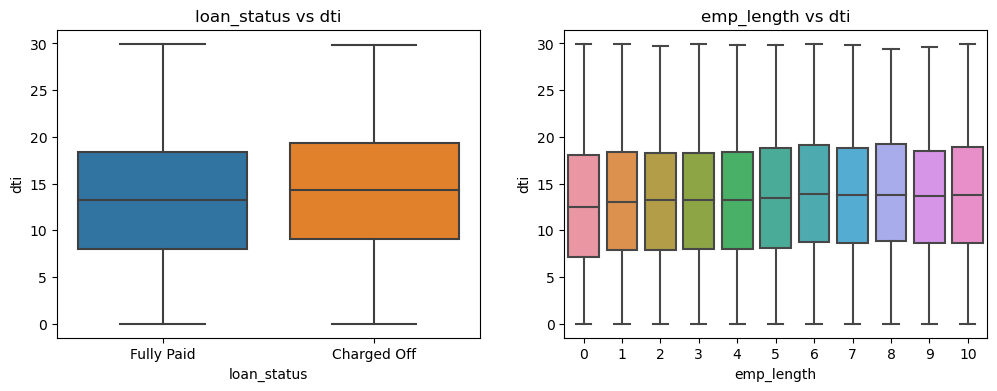

In [42]:

plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y=df_lending_club.dti, data=df_lending_club)
plt.title('loan_status vs dti')

plt.subplot(1,2,2)
sns.boxplot(x='emp_length', y=df_lending_club.dti, data=df_lending_club)
plt.title('emp_length vs dti')


Observations : Borrowers with high dti has bit more probability to default
    No particular observation on emp_length

Text(0.5, 1.0, 'grade vs dti')

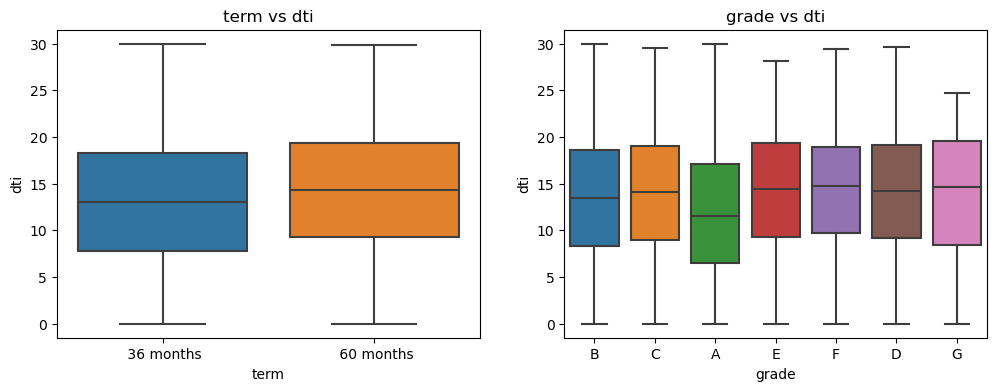

In [43]:
# 2
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='term', y=df_lending_club.dti, data=df_lending_club)
plt.title('term vs dti')
plt.subplot(1,2,2)
sns.boxplot(x='grade', y=df_lending_club.dti, data=df_lending_club)
plt.title('grade vs dti')

Observations : dti is bit high for people who got higher tenure i.e., 60 months.
A Grade barrowers are having low dti than other grades. 

Text(0.5, 1.0, 'verification_status vs dti')

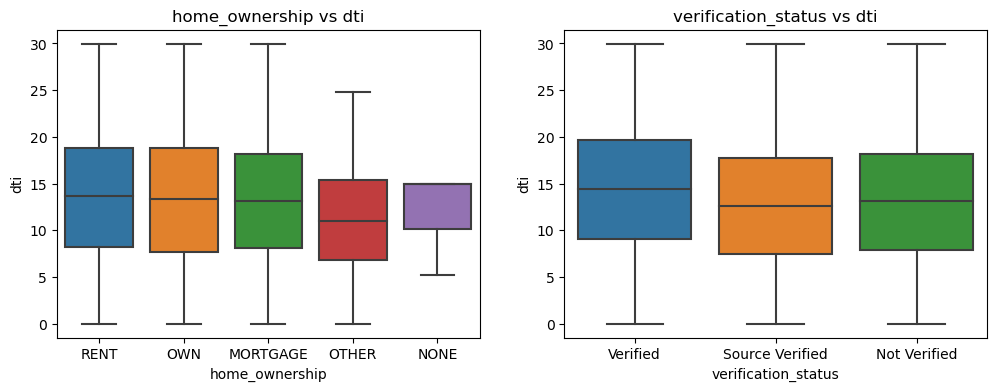

In [44]:
# 3
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y=df_lending_club.dti, data=df_lending_club)
plt.title('home_ownership vs dti')
plt.subplot(1,2,2)
sns.boxplot(x='verification_status', y=df_lending_club.dti, data=df_lending_club)
plt.title('verification_status vs dti')

Observations : People in Other home ownership has less dti than others.
  dti is higher for verified borrowers

Text(0.5, 1.0, 'purpose vs dti')

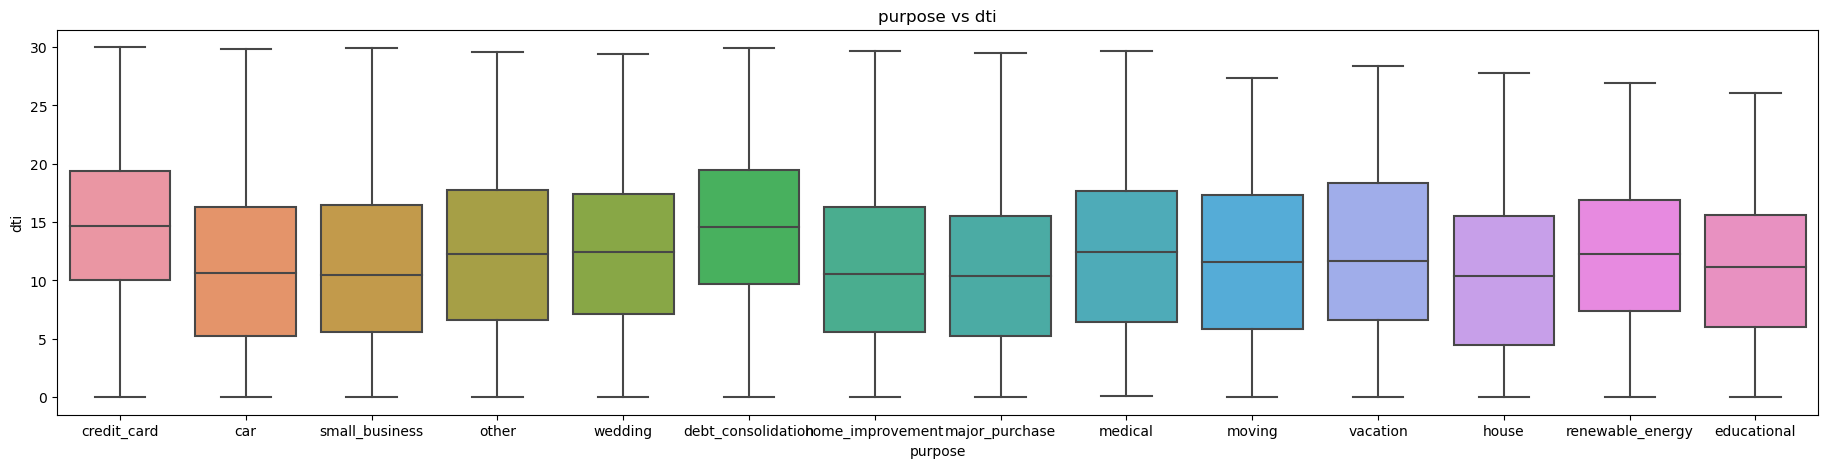

In [45]:
plt.figure(figsize=(50,5))
#Setting subplot index
plt.subplot(1,2,1)
sns.boxplot(x='purpose', y=df_lending_club.dti, data=df_lending_club)

plt.title('purpose vs dti')

Observations : Higher value of dti is observed when purpose is debt_consolidation and credit_card

### Bivariate analysis

Text(0.5, 1.0, 'Term vs Loan status')

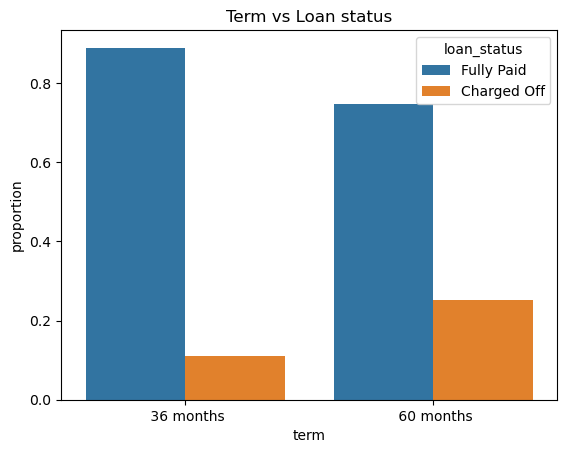

In [46]:
# analyzing loan status and term and plotting them against the proportion
df = df_lending_club.groupby(['term', 'loan_status'], as_index=False)['member_id'].count()
#Proportion of values for each category of loan status
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

Observations : <br>
    $1$. 60months tenure loans are defaulted twice as much as 36 months <br>
    $2$. 36months tenure loans are proportinately more in terms of Fully paid. Hence 36months loans are less likely to be defaulted <br>

Analyze term, int_rate and loan_status

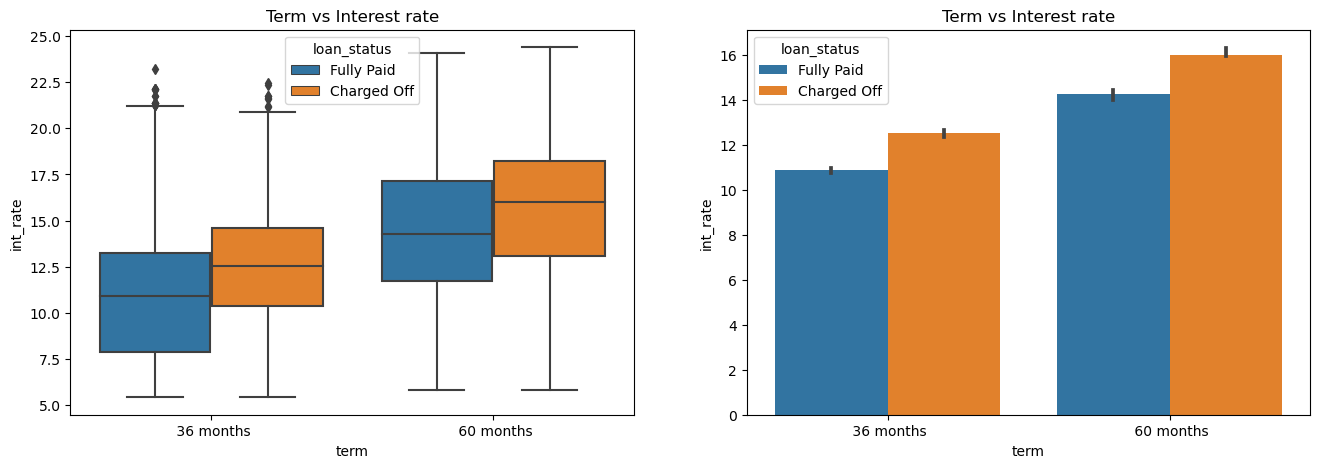

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=df_lending_club)
plt.title('Term vs Interest rate')
plt.subplot(1,2,2)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()


Observation : With higher interest rate default rate is also high in both the loan terms

Analyze term, loan_amnt and loan_status

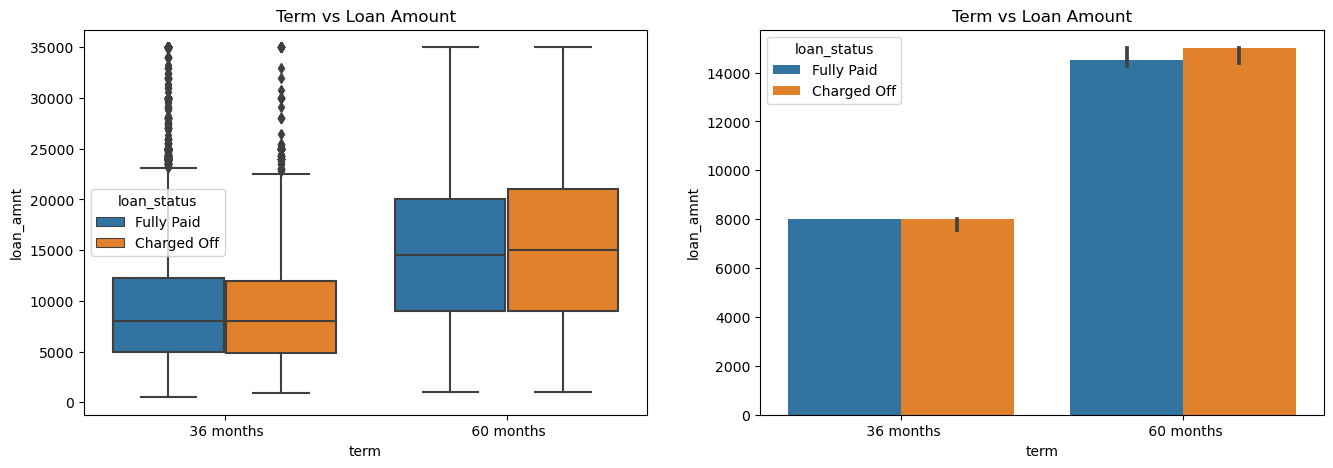

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df_lending_club)
plt.title('Term vs Loan Amount')
plt.subplot(1,2,2)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.title('Term vs Loan Amount')
plt.show()

Observations : Loan amount is higher in 60 months term <br>
               Borrowers have equally defaulted and non-defaulted in both terms

Analyze dti, term and loan status

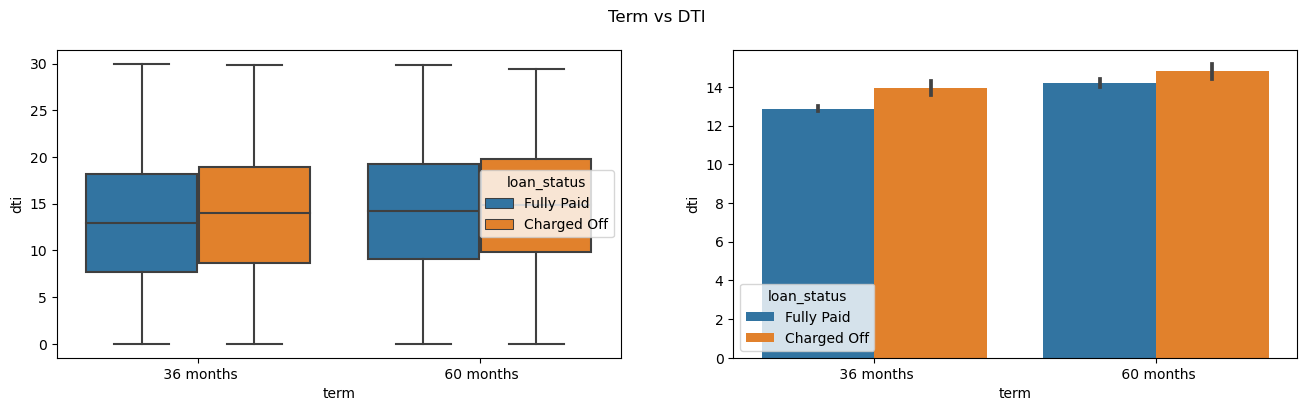

In [49]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='dti', hue='loan_status', data=df_lending_club)
plt.subplot(1,2,2)
sns.barplot(x='term', y='dti', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

Observation : With higher interest rate charge off is more irrespective of term of loan

Analyze Employment length and loan status



Text(0.5, 1.0, 'emp_length vs loan_status')

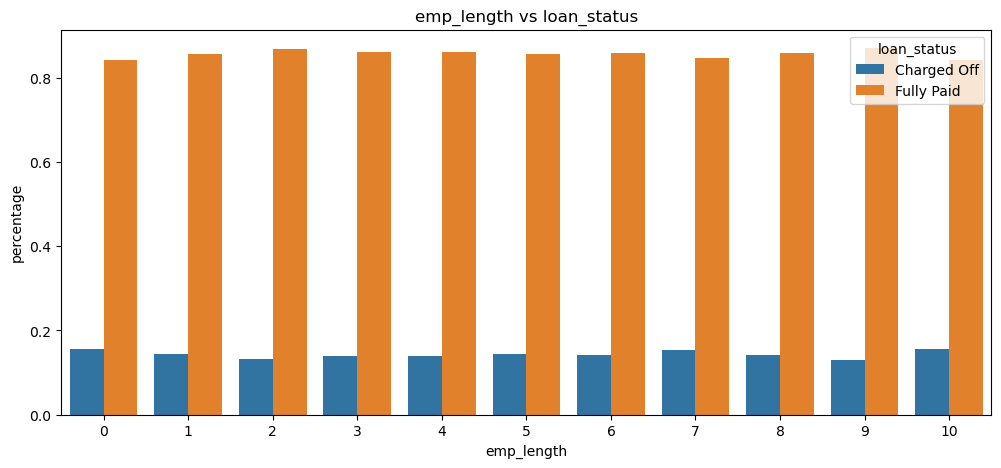

In [50]:
df = df_lending_club.groupby(['emp_length', 'loan_status'], as_index=False)['member_id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('emp_length vs loan_status')

Observation : There is no impact of emp_length on loan_status

Analyze emp_length, loan_amount and loan_status

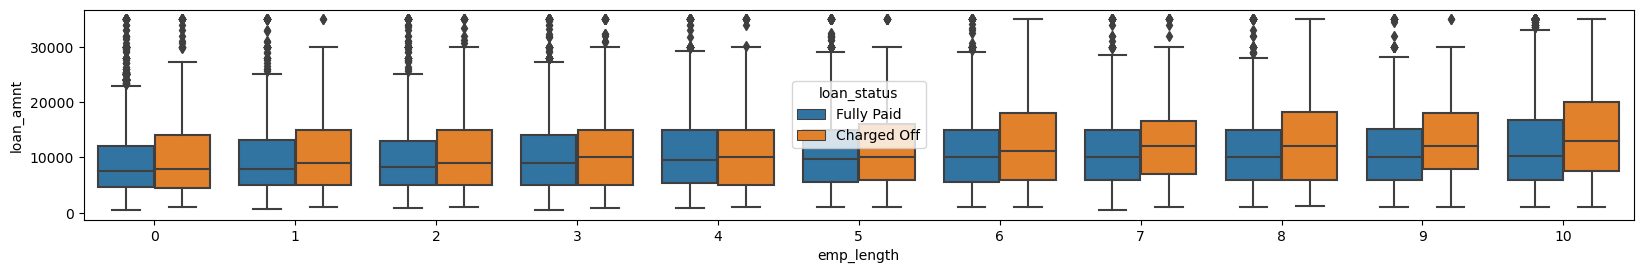

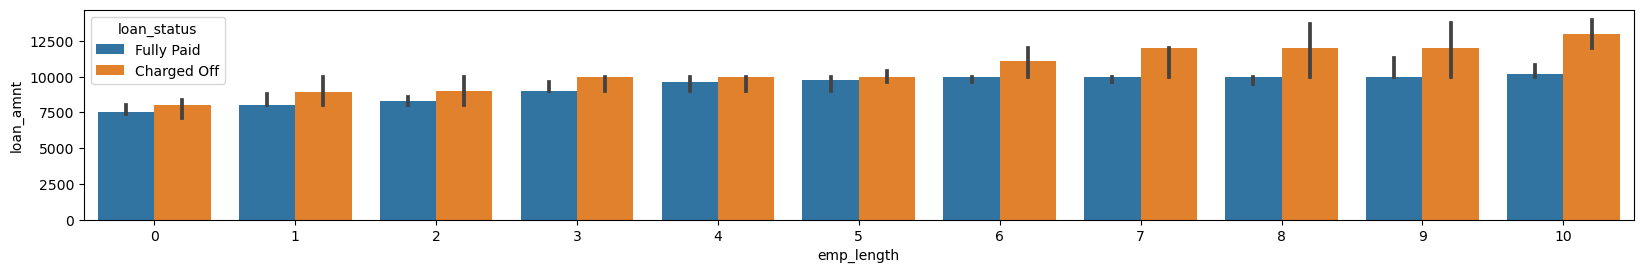

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df_lending_club)
plt.figure(figsize=(20,6))
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.show()

Observation : borrowers with more than 6years employee length when took more loan got more default rate

Analyze emp_length, int_rate and loan_status

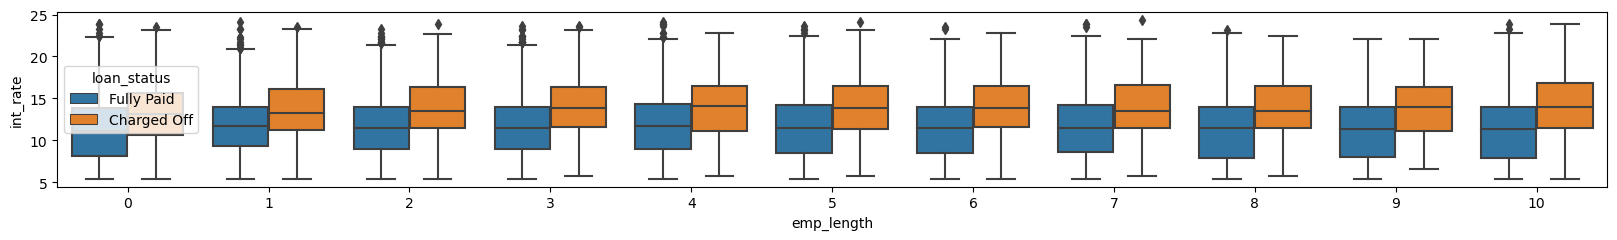

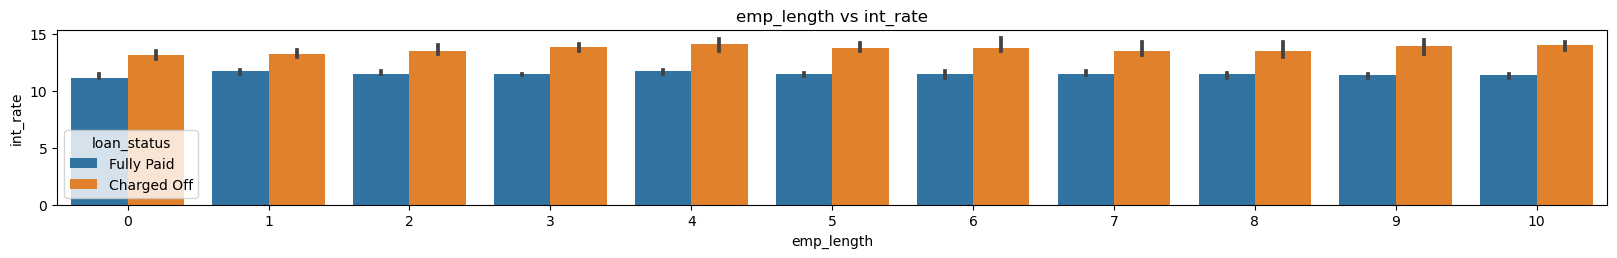

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=df_lending_club)
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.title('emp_length vs int_rate')
plt.show()


Observation : Irrespective of emp_length higher interest rate resulted in more defaults

Analyze emp_length, dti and loan_status

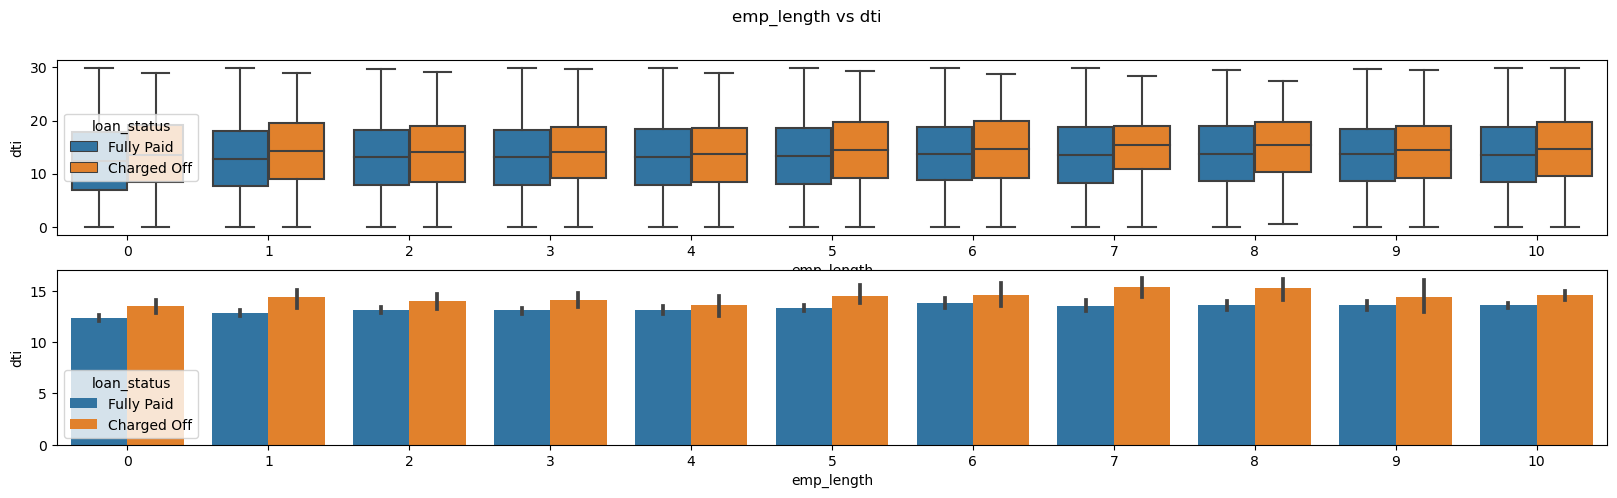

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=df_lending_club)
plt.subplot(2,1,2)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('emp_length vs dti')
plt.show()


Observation : When dti is high charge off is more especially when emp_length is from 5-8 years

Analyze : home_ownership and loan_status along with proportion

Text(0.5, 1.0, 'Home Ownership vs Loan status')

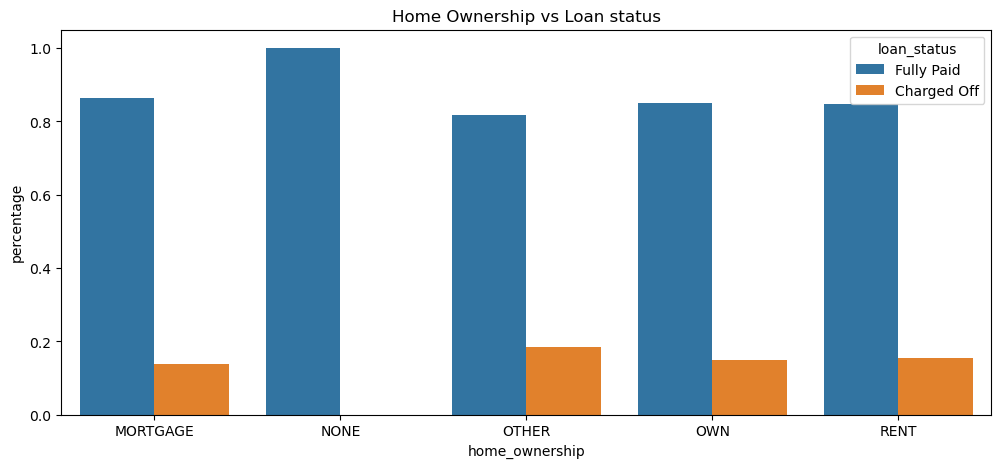

In [54]:
df = df_lending_club.groupby(['home_ownership', 'loan_status'], as_index=False)['member_id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

No significant observation here

Analyze home_ownership, int_rate and loan_status

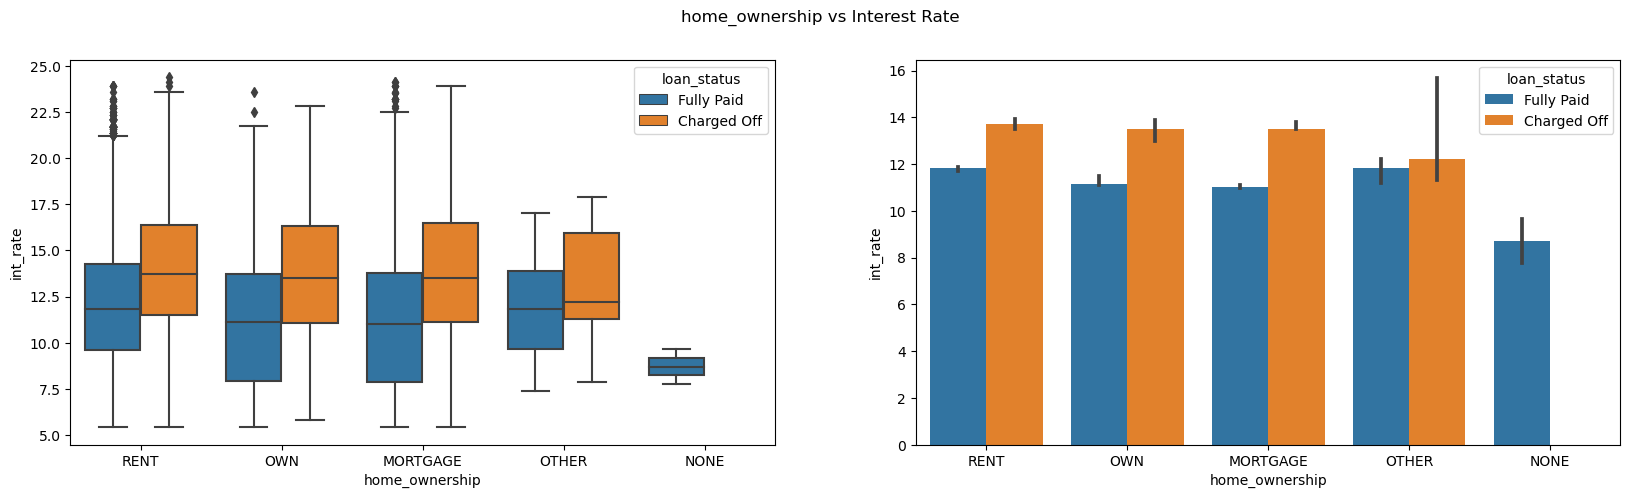

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=df_lending_club)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

Observation : With higher interest rate charge off is high

Analyze home_ownership, loan_amnt and loan_status

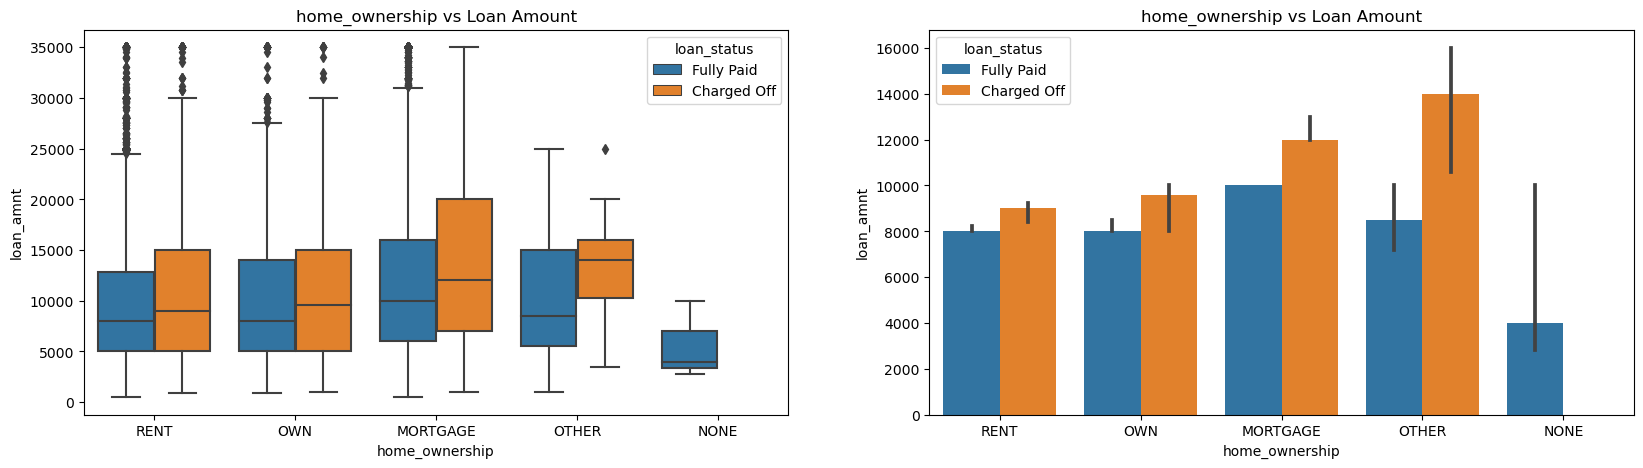

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=df_lending_club)
plt.title('home_ownership vs Loan Amount')
plt.subplot(1,2,2)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

Observation : With increase in loan amount charge off is more especially if house ownership is mortgage or other

Analyze home_ownership and dti

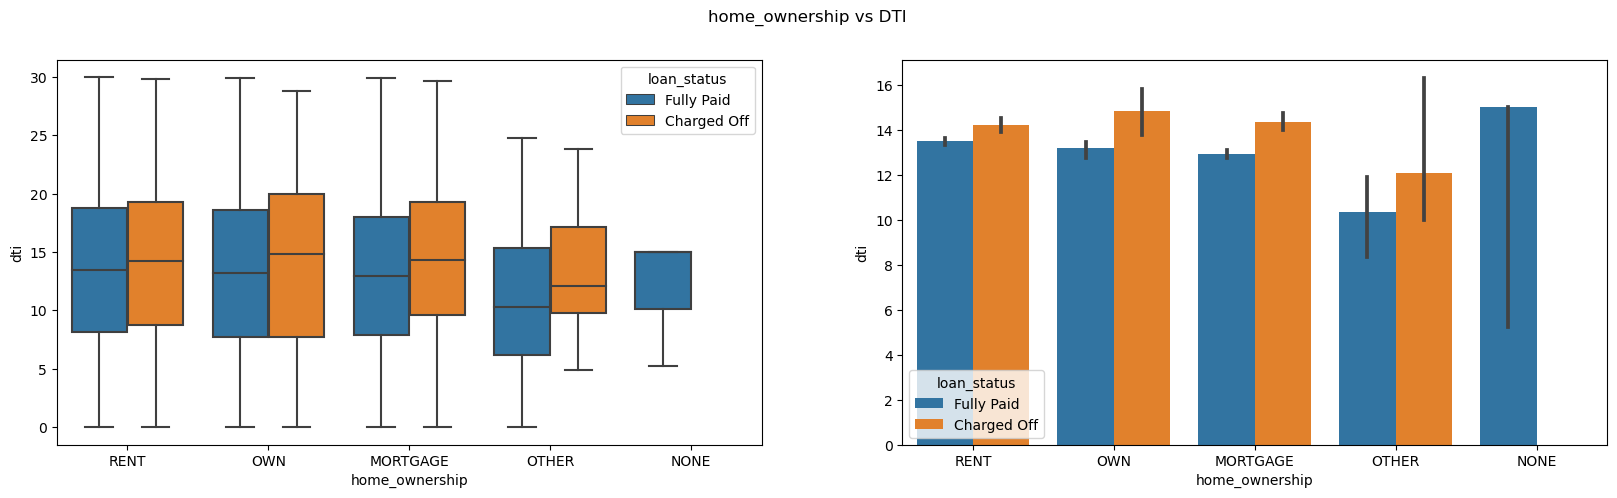

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=df_lending_club)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()


Observation : At higher values of dti charged off is more especially if home ownership is other

Analyze Verification_status and loan_status

Text(0.5, 1.0, 'Verification_status vs Loan status')

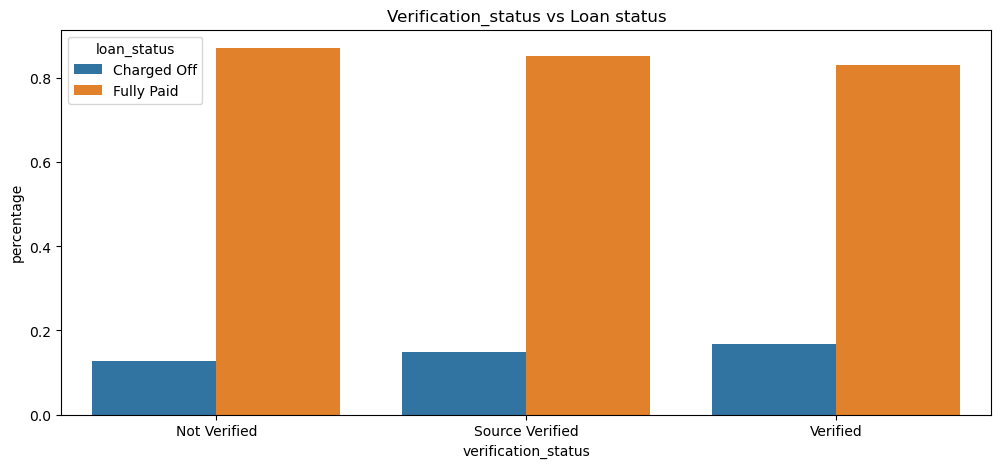

In [58]:
df = df_lending_club.groupby(['verification_status', 'loan_status'], as_index=False)['member_id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Verification_status vs Loan status')

Observations : No change in charged off loans with different types of verification status

Analyzing verification_status with loan_amnt

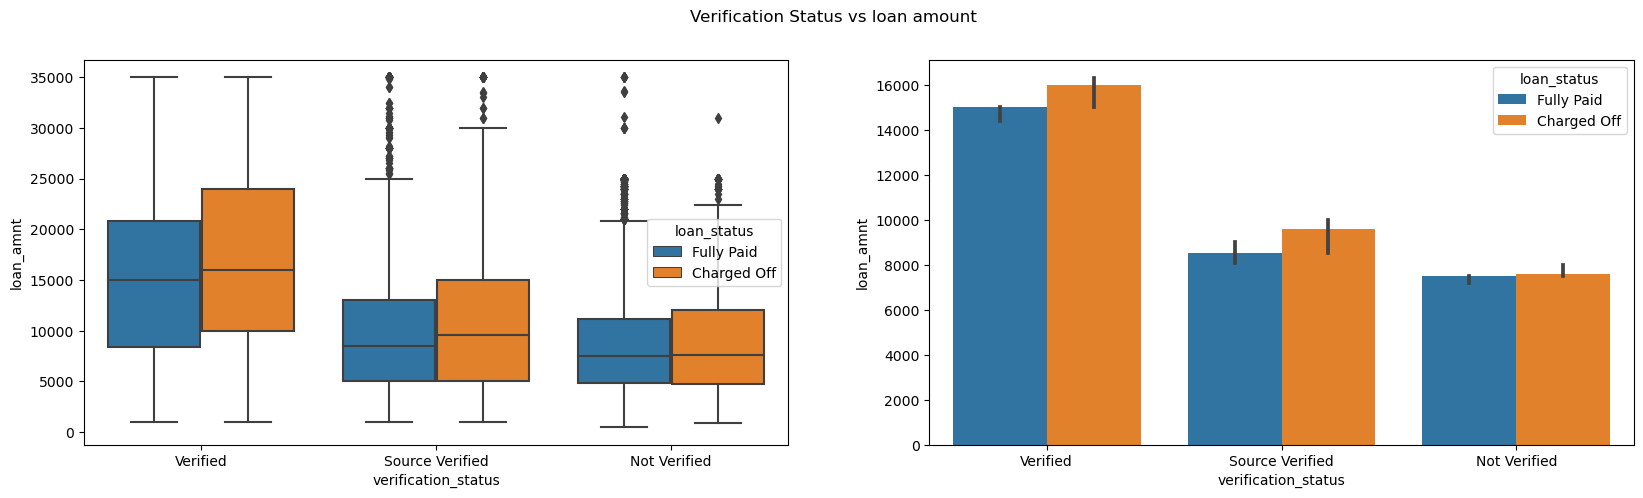

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=df_lending_club)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()


Observation : In income verified when loan amount is more there is more default <br>
              In case of income verified more loans are given and with higher amount and still defaults are high <br>

Analyzing verification_status with int_rate

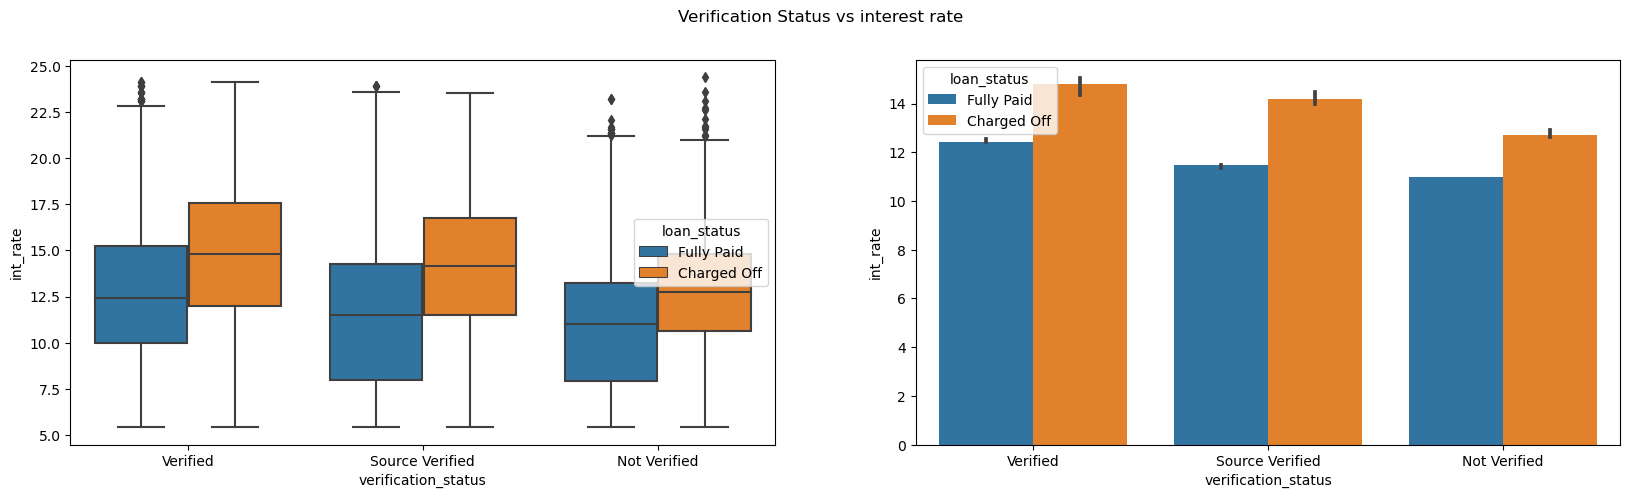

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=df_lending_club)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()


Observation : In all the cases for income verification with high interest rate charged off rate is high

Analyzing verification_status with dti

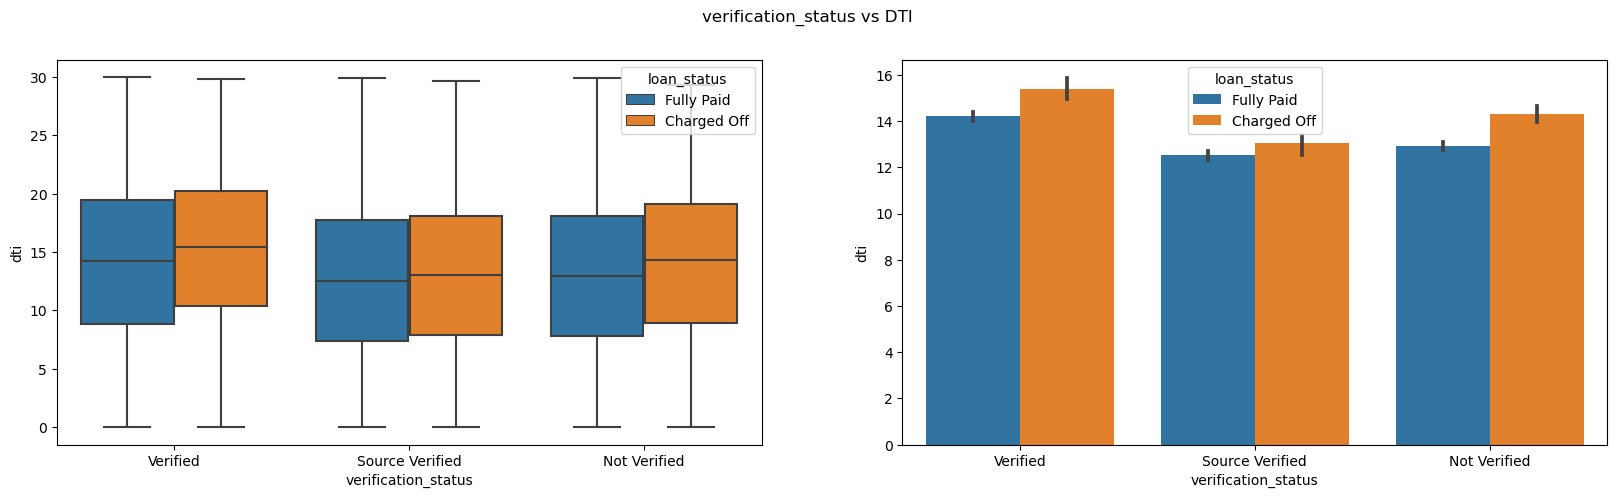

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=df_lending_club)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=df_lending_club, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

Observation : Higher the dti more is charged off rate

Analyzing grade and loan_status

id
1077501    B
1077430    C
1077175    C
1076863    C
1075269    A
          ..
92187      A
90665      C
90395      A
90376      A
87023      E
Name: grade, Length: 38577, dtype: object
['A' 'B' 'C' 'D' 'E' 'F' 'G']


Text(0.5, 1.0, 'Grade vs Loan status')

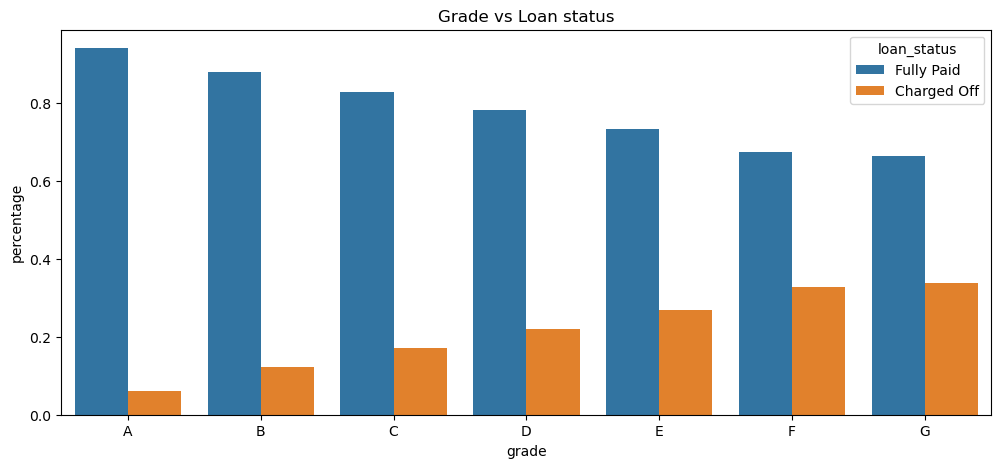

In [62]:
#Sorting Grades from A to G
print(df_lending_club.grade)
grade_ord = df_lending_club.grade.unique()
grade_ord.sort()
print(grade_ord)
df = df_lending_club.groupby(['grade', 'loan_status'], as_index=False)['member_id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

Observation : The default loans increases gradually as the grade goes from A->F

Analyzing grade and loan_amnt

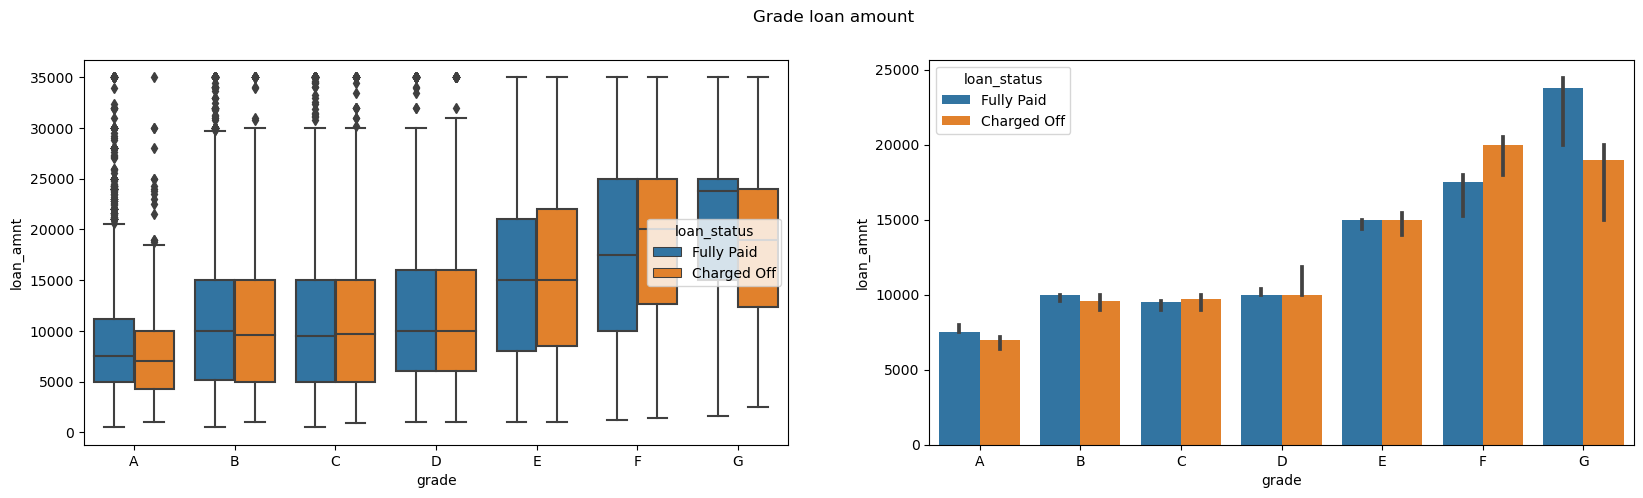

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=df_lending_club, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=df_lending_club, estimator=np.median, order = grade_ord)
plt.suptitle('Grade loan amount')
plt.show()


Observation : Default loans are more in case of grade F and G and so is the loan amount

Analyzing grade and int_rate

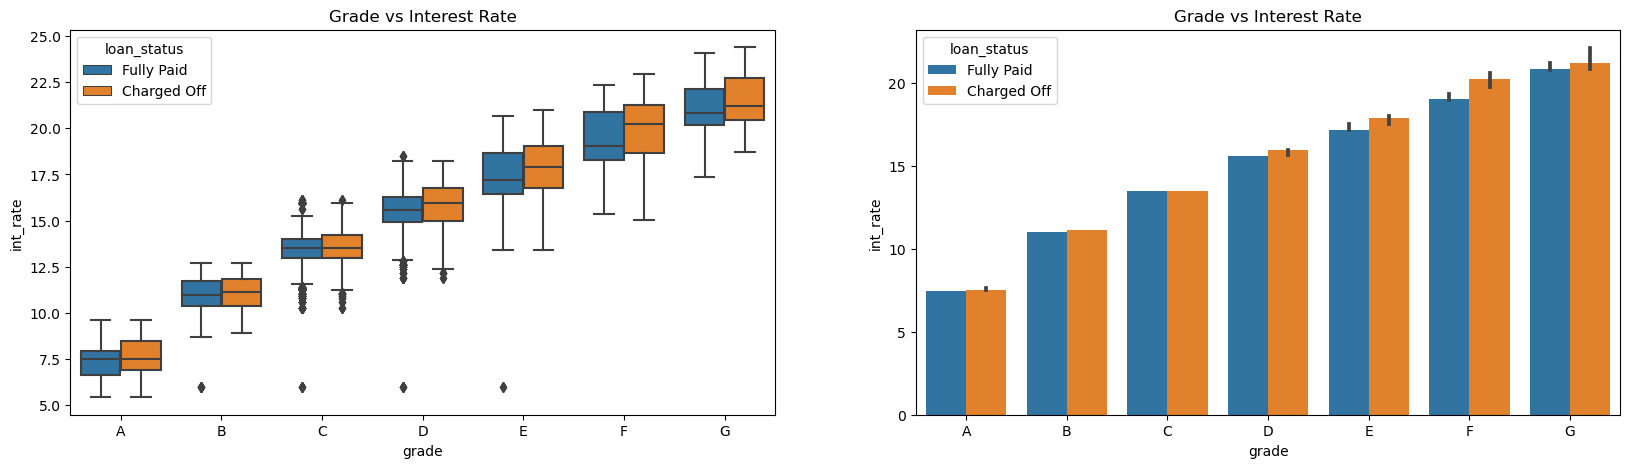

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=df_lending_club, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=df_lending_club, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()


Observations : int_rate increases as grades goes from A->G

Analyzing grade against dti

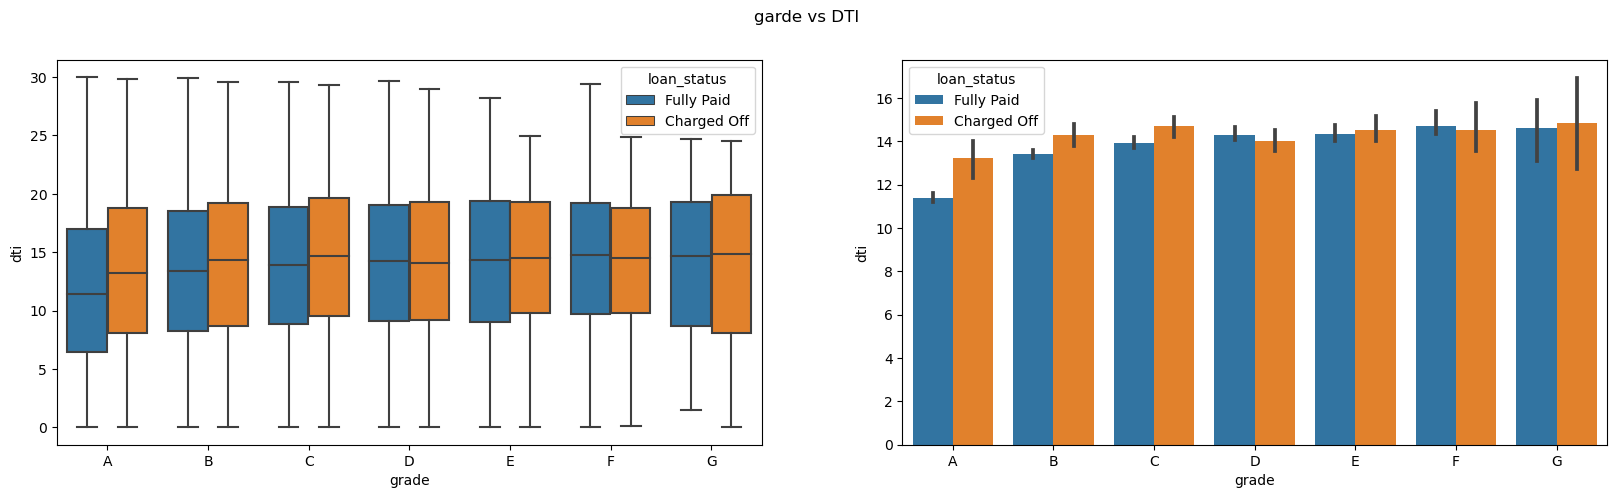

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=df_lending_club, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=df_lending_club, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

Observations : DTI is high for lower grades F,G and charged off loans are also higher for such borrowers and loans

Analyzing purpose v/s loan_Status 

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

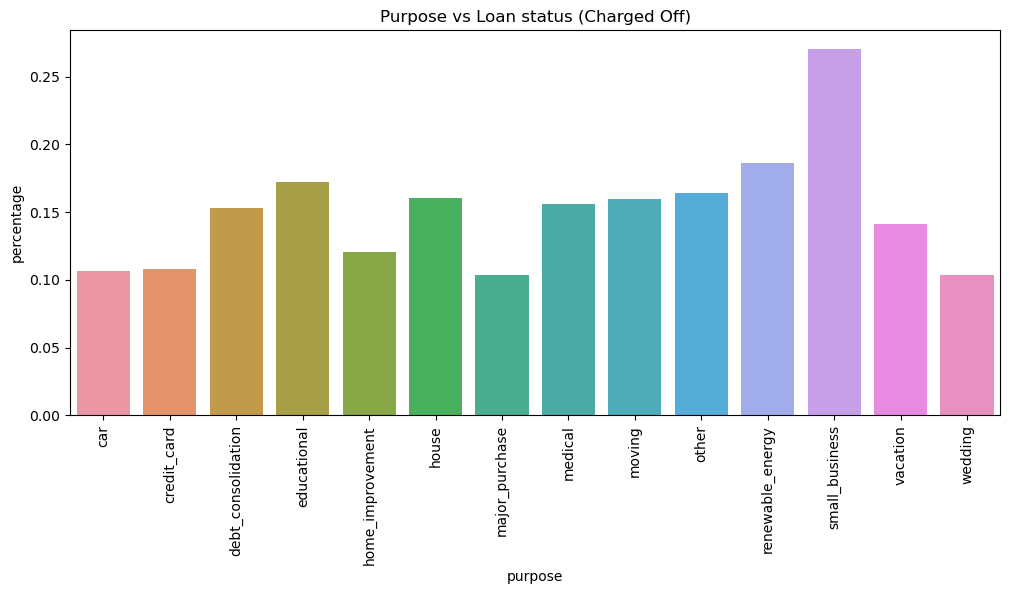

In [66]:
df = df_lending_club.groupby(['purpose', 'loan_status'], as_index=False)['member_id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')


Observations : Default loans are higher for small businesses almost 25% are defaulted
    Car, wedding, credit_car, major_purchase are least defaulted % wise

In [67]:
Analyze purpose, loan_amount and loan_status

SyntaxError: invalid syntax (973885058.py, line 1)

<Figure size 640x480 with 0 Axes>

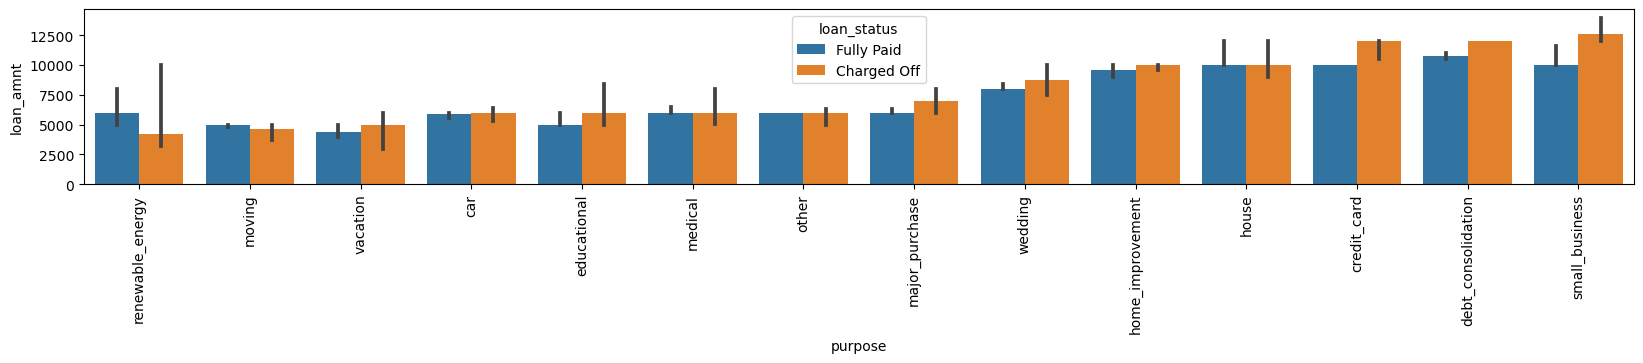

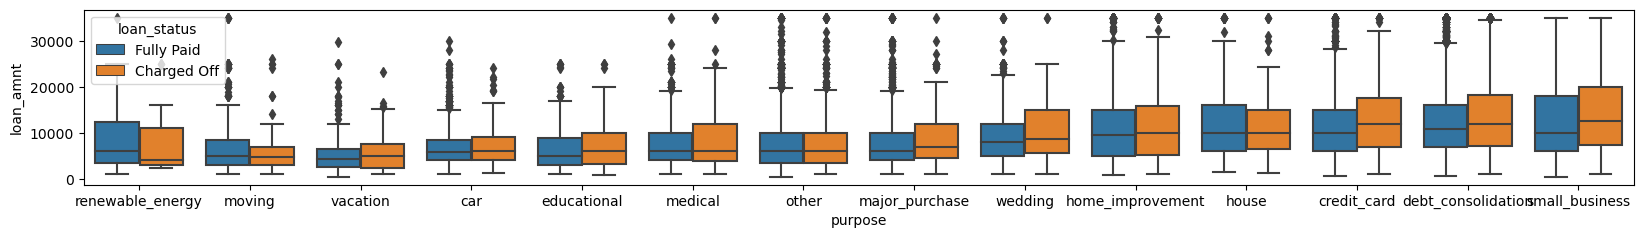

In [68]:
df = df_lending_club.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= df_lending_club, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= df_lending_club, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()


Observations : Small business, credit_card and debt_consolidation purpose has more defaults when loan amount is high. 

In [69]:
Analyze purpose, int_rate and loan_status

SyntaxError: invalid syntax (3057084386.py, line 1)

<Figure size 640x480 with 0 Axes>

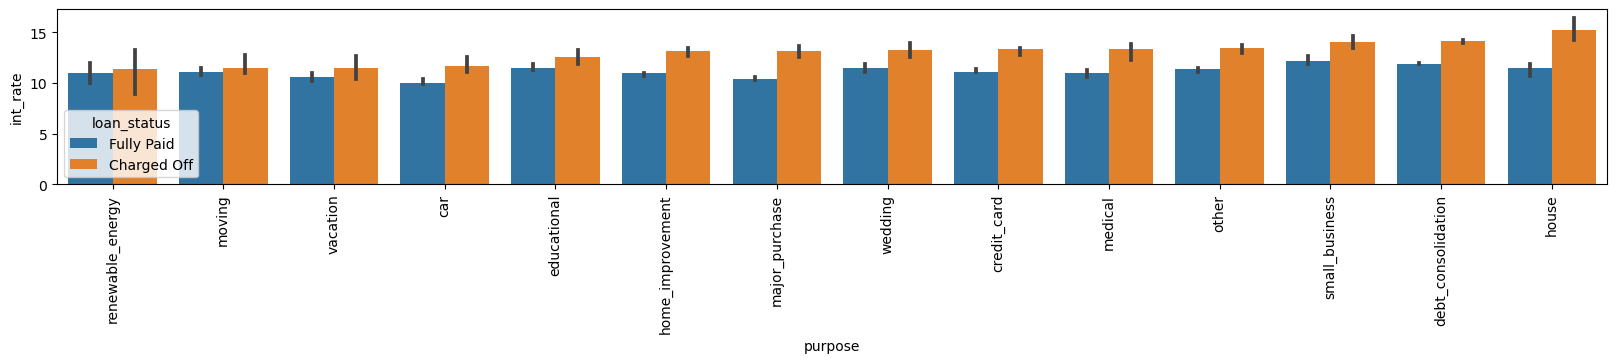

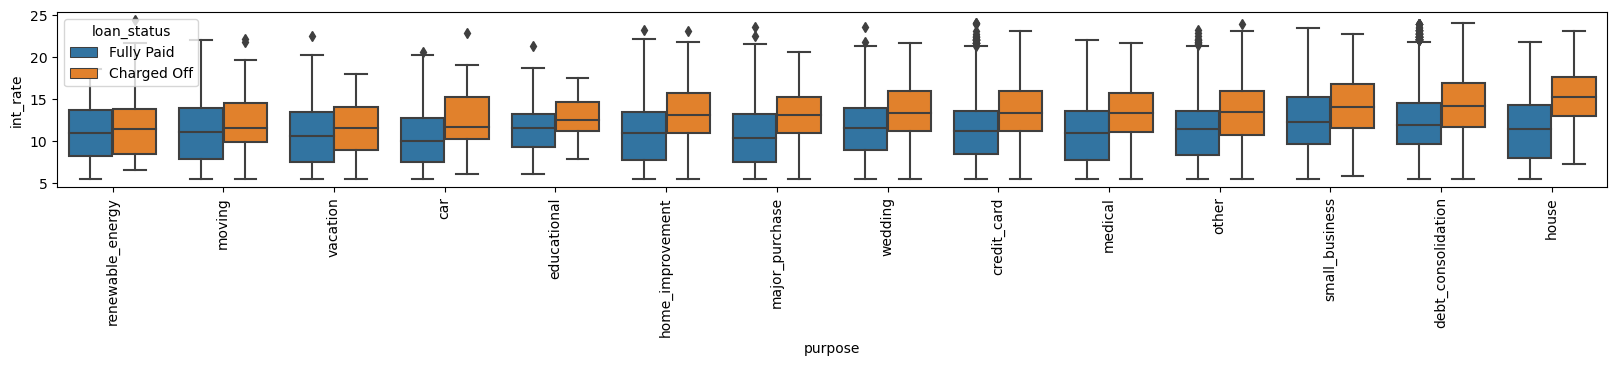

In [70]:
df = df_lending_club.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= df_lending_club, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= df_lending_club, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

Observations : House loans are most defaulted when int_rate is high

In [71]:
Analyzing purpose,dti and loan_status

SyntaxError: invalid syntax (3312050050.py, line 1)

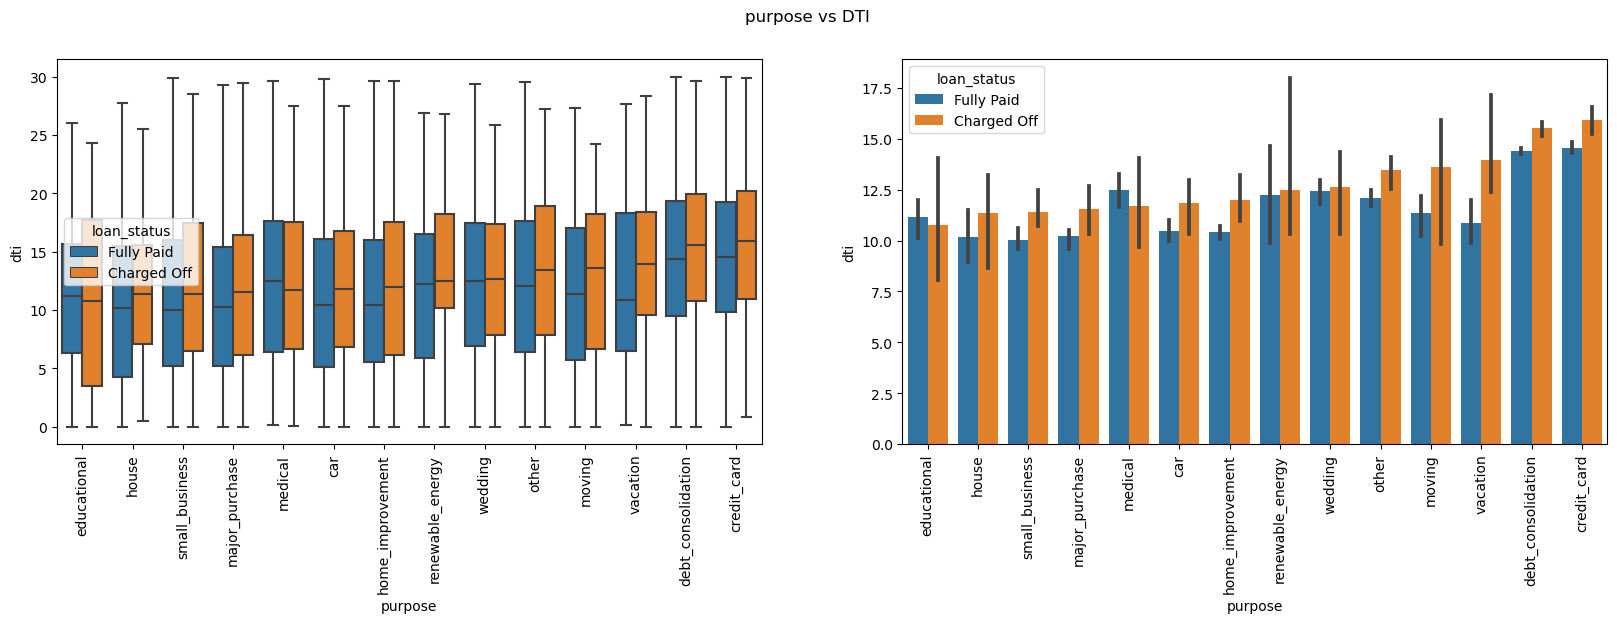

In [72]:
df = df_lending_club.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=df_lending_club, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=df_lending_club, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

Observations : Credit_card and debt_consolidation purpose default loans have high dtis

In [ ]:
Scatter plot for loan_amnt and int_rate

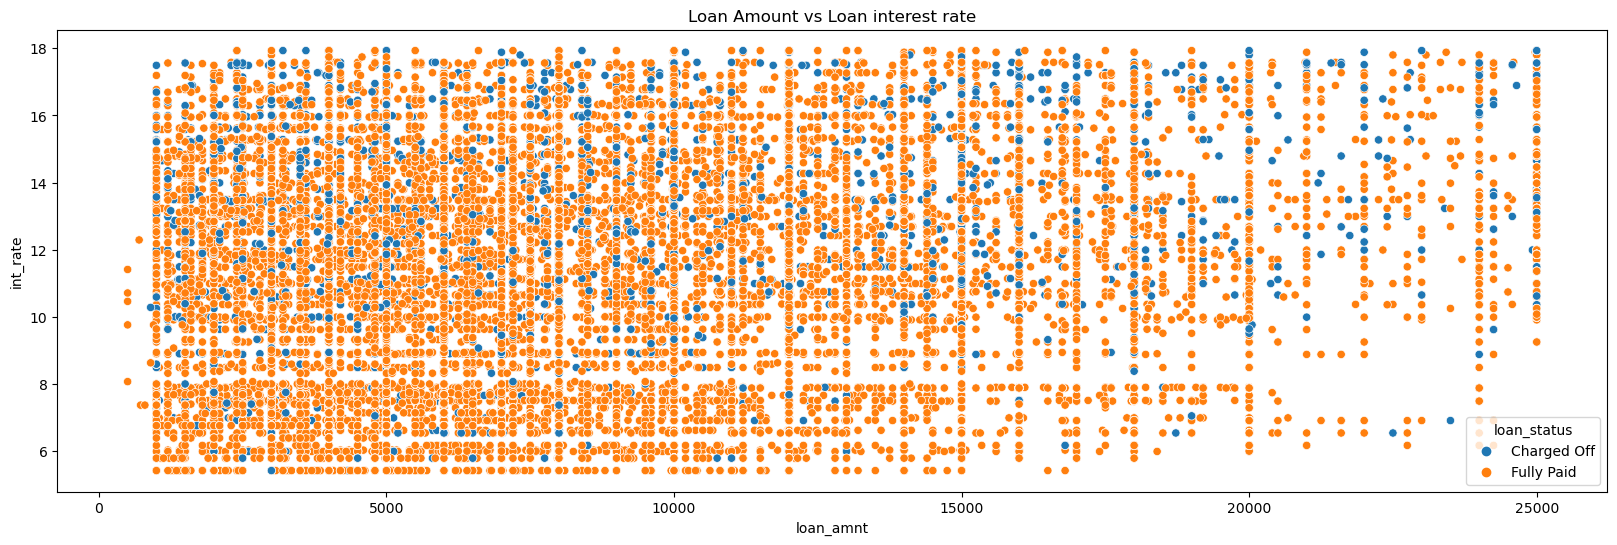

In [70]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=df_lending_club, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

Observations : If loand amount is less and int_rate is also less than higher is chance of loan getting paid off.
    With higher int_rate chances of default increases irrespective of loan amount